# Proyecto Final
## Jason Solano
## Percy Herrera

El set de datos es sobre informacion de campana de recoleccion de dineros de cuentas en mora, es la informacion sobre clientes contactados, con una oferta concreta para cerrar su cuenta en mora por un monto inferior al actual.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('proyectoF1T.csv')
df2 = pd.read_csv('proyectoF2F.csv')
print(df1.shape)
df1.head()

(2595, 31)


id  approval_amount recommendation                   redeem_ts  \
0  503603788            250.0        APPROVE  2019-01-24 09:50:41.115000   
1  399999590             80.0        APPROVE  2019-01-24 17:34:47.768000   
2  330633304            956.0        APPROVE  2019-01-24 18:18:53.120000   
3  422247835              9.0        APPROVE  2019-01-24 18:36:06.694000   
4  427183074            250.0        APPROVE  2019-01-25 08:47:49.726000   

   contacted          email_contacted_ts            sms_contacted_ts  \
0      False                         NaN  2019-01-24 09:36:27.784000   
1      False  2019-01-24 12:16:54.626000                         NaN   
2      False  2019-01-24 13:17:29.359000  2019-01-24 13:15:59.087000   
3      False                         NaN  2019-01-24 13:19:17.988000   
4      False  2019-01-24 09:08:46.690000  2019-01-24 09:08:20.447000   

     birth_dt state         city         ...           account_payment_method  \
0  1988-05-21    CO       Aurora         ...                           MANUAL   
1  1998-01-13    TX  Weatherford         ...                           MANUAL   
2  1975-12-09    WA      Othello         ...                           MANUAL   
3  1985-09-09    CA     Imperial         ...                           MANUAL   
4  1980-11-23    OH    Cleveland         ...                           MANUAL   

  collections_category  days_past_due  number_of_payments amount_financed  \
0                  NaN              0                  52             NaN   
1                  NaN              0                  26             0.0   
2                  NaN              0                  12             0.0   
3                  NaN              0                  26             0.0   
4                  NaN              0                  26             0.0   

   data_correction merchant_id    source initial_decision  last_payment_amount  
0            False    14206566  MERCHANT         APPROVED                70.34  
1            False   107313386  INTERNET         APPROVED                  NaN  
2            False   230266536  MERCHANT         APPROVED                  NaN  
3            False   332752404  MERCHANT         APPROVED                  NaN  
4            False   358414568  MERCHANT         APPROVED                  NaN  

[5 rows x 31 columns]

# Preprocesado de la data

Ahora necesitamos procesar los dos dataframes para unirlos y eliminar algunas columnas para lograr una primera version del set de datos lo suficientemente simple para empezar nuestros analysis e ir agregando columnda y datos conforme necesitemos.

In [2]:
df1 = df1.append(df2)
df2 = None    
print(df1.shape)

(6095, 31)


In [3]:
dfp = df1.filter(['approval_amount','contacted','email_contacted_ts','sms_contacted_ts'
                  ,'birth_dt','rent_or_own','months_at_current_residence','years_at_current_residence'
                  ,'direct_deposit','black_listed','language_preference','military_applicant'
                  ,'scheduled_payment_amt','number_of_payments','initial_decision','last_payment_amount'], axis=1)
print(dfp.shape)
dfp.head()

(6095, 16)


approval_amount  contacted          email_contacted_ts  \
0            250.0      False                         NaN   
1             80.0      False  2019-01-24 12:16:54.626000   
2            956.0      False  2019-01-24 13:17:29.359000   
3              9.0      False                         NaN   
4            250.0      False  2019-01-24 09:08:46.690000   

             sms_contacted_ts    birth_dt rent_or_own  \
0  2019-01-24 09:36:27.784000  1988-05-21        RENT   
1                         NaN  1998-01-13        RENT   
2  2019-01-24 13:15:59.087000  1975-12-09        RENT   
3  2019-01-24 13:19:17.988000  1985-09-09        RENT   
4  2019-01-24 09:08:20.447000  1980-11-23        RENT   

   months_at_current_residence  years_at_current_residence direct_deposit  \
0                            1                           2           True   
1                            0                           1           True   
2                            0                           1          False   
3                           11                           0          False   
4                            0                           6           True   

   black_listed language_preference  military_applicant  \
0         False                  EN               False   
1         False                  EN               False   
2         False                  ES               False   
3         False                  EN               False   
4         False                  EN               False   

   scheduled_payment_amt  number_of_payments initial_decision  \
0                  18.84                  52         APPROVED   
1                  32.88                  26         APPROVED   
2                 423.50                  12         APPROVED   
3                  18.15                  26         APPROVED   
4                  87.73                  26         APPROVED   

   last_payment_amount  
0                70.34  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [4]:
dfp_target = df1.filter(['redeem_ts'], axis=1)
print(dfp_target.shape)
dfp_target.head()

(6095, 1)


redeem_ts
0  2019-01-24 09:50:41.115000
1  2019-01-24 17:34:47.768000
2  2019-01-24 18:18:53.120000
3  2019-01-24 18:36:06.694000
4  2019-01-25 08:47:49.726000

## Analisis de porcentaje de nulos
 
En este paso analizamos el porcentaje de las columnas para validar si hay columnas que no nos aporten datos validos para el caso

In [5]:
dfp.isna().mean().round(4) * 100

approval_amount                 0.00
contacted                       0.00
email_contacted_ts              7.86
sms_contacted_ts               39.93
birth_dt                        0.00
rent_or_own                     0.00
months_at_current_residence     0.00
years_at_current_residence      0.00
direct_deposit                  0.28
black_listed                    0.00
language_preference             0.00
military_applicant              0.00
scheduled_payment_amt           0.00
number_of_payments              0.00
initial_decision                0.00
last_payment_amount            50.06
dtype: float64

Ahora hacemos el mismo analisis para el data frame con la data de target

In [6]:
dfp_target.isna().mean().round(4) * 100

redeem_ts    57.42
dtype: float64

### last_payment_amount

Es la candidata a eliminar por tener un porcentaje muy alto de valores nulos (50.06%) por lo cual no nos aportaria informacion importante para nuestro modelo.

### sms_contacted_ts

Esta columna no aplica dado que los nulos equivalen a personas que no fueron contactadas por SMS, esta informacion si es importante para nuestro analisis, en un paso posterior remplazaremos estos valores por valores booleanos para identificar las personas contactadas por este medio.

### Dataframe de target redeem_ts

Un caso muy similar a las otra columnas donde los valores nulos serian personas que no canjearon su oferta, y las instancias con valores de fecha serian las personas que si cancelaron aprovechando la oferta.

In [7]:
dfp.shape

print(dfp.shape)
dfp = dfp.drop('last_payment_amount', 1)
print(dfp.columns)

(6095, 16)
Index([u'approval_amount', u'contacted', u'email_contacted_ts',
       u'sms_contacted_ts', u'birth_dt', u'rent_or_own',
       u'months_at_current_residence', u'years_at_current_residence',
       u'direct_deposit', u'black_listed', u'language_preference',
       u'military_applicant', u'scheduled_payment_amt', u'number_of_payments',
       u'initial_decision'],
      dtype='object')


## Conversion de los campos fecha a boolean

Tomando en cuenta el conocimiento del negocio estas dos columnas "email_contacted_ts" y "sms_contacted_ts" son tipo timestamp pero indican el momento que la persona fue contactado, para efectos de nuestro analysis vamos a convertir las columnas con dato en valor "True" y las nulas en "False".

In [8]:
dfp.loc[~dfp.email_contacted_ts.isnull(),"email_contacted_ts"]=True 
dfp.loc[~dfp.sms_contacted_ts.isnull(),"sms_contacted_ts"]=True 

dfp.head()

approval_amount  contacted email_contacted_ts sms_contacted_ts    birth_dt  \
0            250.0      False                NaN             True  1988-05-21   
1             80.0      False               True              NaN  1998-01-13   
2            956.0      False               True             True  1975-12-09   
3              9.0      False                NaN             True  1985-09-09   
4            250.0      False               True             True  1980-11-23   

  rent_or_own  months_at_current_residence  years_at_current_residence  \
0        RENT                            1                           2   
1        RENT                            0                           1   
2        RENT                            0                           1   
3        RENT                           11                           0   
4        RENT                            0                           6   

  direct_deposit  black_listed language_preference  military_applicant  \
0           True         False                  EN               False   
1           True         False                  EN               False   
2          False         False                  ES               False   
3          False         False                  EN               False   
4           True         False                  EN               False   

   scheduled_payment_amt  number_of_payments initial_decision  
0                  18.84                  52         APPROVED  
1                  32.88                  26         APPROVED  
2                 423.50                  12         APPROVED  
3                  18.15                  26         APPROVED  
4                  87.73                  26         APPROVED

In [9]:
dfp["email_contacted_ts"].fillna(False, inplace = True) 
dfp["sms_contacted_ts"].fillna(False, inplace = True) 
dfp.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0            250.0      False               False              True   
1             80.0      False                True             False   
2            956.0      False                True              True   
3              9.0      False               False              True   
4            250.0      False                True              True   

     birth_dt rent_or_own  months_at_current_residence  \
0  1988-05-21        RENT                            1   
1  1998-01-13        RENT                            0   
2  1975-12-09        RENT                            0   
3  1985-09-09        RENT                           11   
4  1980-11-23        RENT                            0   

   years_at_current_residence direct_deposit  black_listed  \
0                           2           True         False   
1                           1           True         False   
2                           1          False         False   
3                           0          False         False   
4                           6           True         False   

  language_preference  military_applicant  scheduled_payment_amt  \
0                  EN               False                  18.84   
1                  EN               False                  32.88   
2                  ES               False                 423.50   
3                  EN               False                  18.15   
4                  EN               False                  87.73   

   number_of_payments initial_decision  
0                  52         APPROVED  
1                  26         APPROVED  
2                  12         APPROVED  
3                  26         APPROVED  
4                  26         APPROVED

Procesamiento similar para los datos target que indican las personas que cancelaron usando la oferta

In [10]:
dfp_target.loc[~dfp_target.redeem_ts.isnull(),"redeem_ts"]=True 
dfp_target["redeem_ts"].fillna(False, inplace = True) 
dfp_target.head()

redeem_ts
0       True
1       True
2       True
3       True
4       True

Volvemos a validad el porcentaje de nulos para el dataframe de target

In [11]:
dfp_target.isna().mean().round(4) * 100

redeem_ts    0.0
dtype: float64

Como podemos comprobar nuestro dataframe de target esta listo y libre de valores nulos.



Remplazo de los valores nulos para la columna "direct_deposit"

In [12]:
dfp["direct_deposit"].fillna(False, inplace = True) 

Volvemos a verificar el porcentaje de nulos solo para confirmar que lo anterior funciono correctamente y no tengamos mas valores nulos en ninguna de nuestras columnas

In [13]:
dfp.isna().mean().round(4) * 100

approval_amount                0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
birth_dt                       0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
scheduled_payment_amt          0.0
number_of_payments             0.0
initial_decision               0.0
dtype: float64

## Remplazo de la columna date of birth por Edad

Hacemos calculo de la edad con base en el dato de la columna date of birth

In [14]:
now = pd.Timestamp('now')
dfp['birth_dt'] = pd.to_datetime(dfp['birth_dt'])   
dfp['age'] = (now - dfp['birth_dt']).astype('<m8[Y]')    

dfp.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0            250.0      False               False              True   
1             80.0      False                True             False   
2            956.0      False                True              True   
3              9.0      False               False              True   
4            250.0      False                True              True   

    birth_dt rent_or_own  months_at_current_residence  \
0 1988-05-21        RENT                            1   
1 1998-01-13        RENT                            0   
2 1975-12-09        RENT                            0   
3 1985-09-09        RENT                           11   
4 1980-11-23        RENT                            0   

   years_at_current_residence  direct_deposit  black_listed  \
0                           2            True         False   
1                           1            True         False   
2                           1           False         False   
3                           0           False         False   
4                           6            True         False   

  language_preference  military_applicant  scheduled_payment_amt  \
0                  EN               False                  18.84   
1                  EN               False                  32.88   
2                  ES               False                 423.50   
3                  EN               False                  18.15   
4                  EN               False                  87.73   

   number_of_payments initial_decision   age  
0                  52         APPROVED  31.0  
1                  26         APPROVED  21.0  
2                  12         APPROVED  43.0  
3                  26         APPROVED  33.0  
4                  26         APPROVED  38.0

In [15]:
dfp = dfp.drop('birth_dt', 1)
dfp.head()


approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0            250.0      False               False              True   
1             80.0      False                True             False   
2            956.0      False                True              True   
3              9.0      False               False              True   
4            250.0      False                True              True   

  rent_or_own  months_at_current_residence  years_at_current_residence  \
0        RENT                            1                           2   
1        RENT                            0                           1   
2        RENT                            0                           1   
3        RENT                           11                           0   
4        RENT                            0                           6   

   direct_deposit  black_listed language_preference  military_applicant  \
0            True         False                  EN               False   
1            True         False                  EN               False   
2           False         False                  ES               False   
3           False         False                  EN               False   
4            True         False                  EN               False   

   scheduled_payment_amt  number_of_payments initial_decision   age  
0                  18.84                  52         APPROVED  31.0  
1                  32.88                  26         APPROVED  21.0  
2                 423.50                  12         APPROVED  43.0  
3                  18.15                  26         APPROVED  33.0  
4                  87.73                  26         APPROVED  38.0

### Salvado del progreso 

Por medio del metodo "to_csv" de pandas guardamos en un archivo csv el dataframe con el procesamiento hasta el momento

In [16]:
dfp.to_csv ('settlementsdataset.csv', index = None, header=True) 


## Remplazo de las variables categoricas por binarias

In [17]:
dfp['contacted']=dfp['contacted'].replace({False: 0, True :1})
dfp['email_contacted_ts']=dfp['email_contacted_ts'].replace({False: 0, True :1})
dfp['sms_contacted_ts']=dfp['sms_contacted_ts'].replace({False: 0, True :1})
dfp['rent_or_own']=dfp['rent_or_own'].replace({'RENT': 0, 'OWN' :1})
dfp['direct_deposit']=dfp['direct_deposit'].replace({False: 0, True :1})
dfp['black_listed']=dfp['black_listed'].replace({False: 0, True :1})
dfp['language_preference']=dfp['language_preference'].replace({'EN': 0, 'ES' :1})
dfp['military_applicant']=dfp['military_applicant'].replace({False: 0, True :1})
dfp.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0            250.0          0                   0                 1   
1             80.0          0                   1                 0   
2            956.0          0                   1                 1   
3              9.0          0                   0                 1   
4            250.0          0                   1                 1   

   rent_or_own  months_at_current_residence  years_at_current_residence  \
0            0                            1                           2   
1            0                            0                           1   
2            0                            0                           1   
3            0                           11                           0   
4            0                            0                           6   

   direct_deposit  black_listed  language_preference  military_applicant  \
0               1             0                    0                   0   
1               1             0                    0                   0   
2               0             0                    1                   0   
3               0             0                    0                   0   
4               1             0                    0                   0   

   scheduled_payment_amt  number_of_payments initial_decision   age  
0                  18.84                  52         APPROVED  31.0  
1                  32.88                  26         APPROVED  21.0  
2                 423.50                  12         APPROVED  43.0  
3                  18.15                  26         APPROVED  33.0  
4                  87.73                  26         APPROVED  38.0

## One hot enconding de las columnas de categorias

Ahora necesitamos codificar correctamente las columnas con categorias para poder utilizarlas en nuestro algoritmo.

In [18]:
processed_data = pd.get_dummies(dfp, columns=['initial_decision'])
processed_data.head()


approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0            250.0          0                   0                 1   
1             80.0          0                   1                 0   
2            956.0          0                   1                 1   
3              9.0          0                   0                 1   
4            250.0          0                   1                 1   

   rent_or_own  months_at_current_residence  years_at_current_residence  \
0            0                            1                           2   
1            0                            0                           1   
2            0                            0                           1   
3            0                           11                           0   
4            0                            0                           6   

   direct_deposit  black_listed  language_preference  military_applicant  \
0               1             0                    0                   0   
1               1             0                    0                   0   
2               0             0                    1                   0   
3               0             0                    0                   0   
4               1             0                    0                   0   

   scheduled_payment_amt  number_of_payments   age  initial_decision_APPROVED  \
0                  18.84                  52  31.0                          1   
1                  32.88                  26  21.0                          1   
2                 423.50                  12  43.0                          1   
3                  18.15                  26  33.0                          1   
4                  87.73                  26  38.0                          1   

   initial_decision_APPROVED_WITH_CONDITIONS  initial_decision_DENIED  
0                                          0                        0  
1                                          0                        0  
2                                          0                        0  
3                                          0                        0  
4                                          0                        0

Renombrado de columnas con nombres muy largos, para mejorar visualizaciones

In [19]:
processed_data.rename(columns={'initial_decision_APPROVED': 'ini_decision_apv',
                              'initial_decision_APPROVED_WITH_CONDITIONS':'ini_decision_apv_wc',
                              'initial_decision_DENIED':'ini_decision_dnd'}, inplace=True)


In [20]:
print(dfp.shape)
print(processed_data.shape)
print(dfp_target.shape)
processed_data.isna().mean().round(4) * 100

(6095, 15)
(6095, 17)
(6095, 1)


approval_amount                0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
scheduled_payment_amt          0.0
number_of_payments             0.0
age                            0.0
ini_decision_apv               0.0
ini_decision_apv_wc            0.0
ini_decision_dnd               0.0
dtype: float64

# Analisis Grafico de los datos

Analicemos graficamente la distribucion de variables usando un histograma para revisar que variables pueden tener valores atipicos

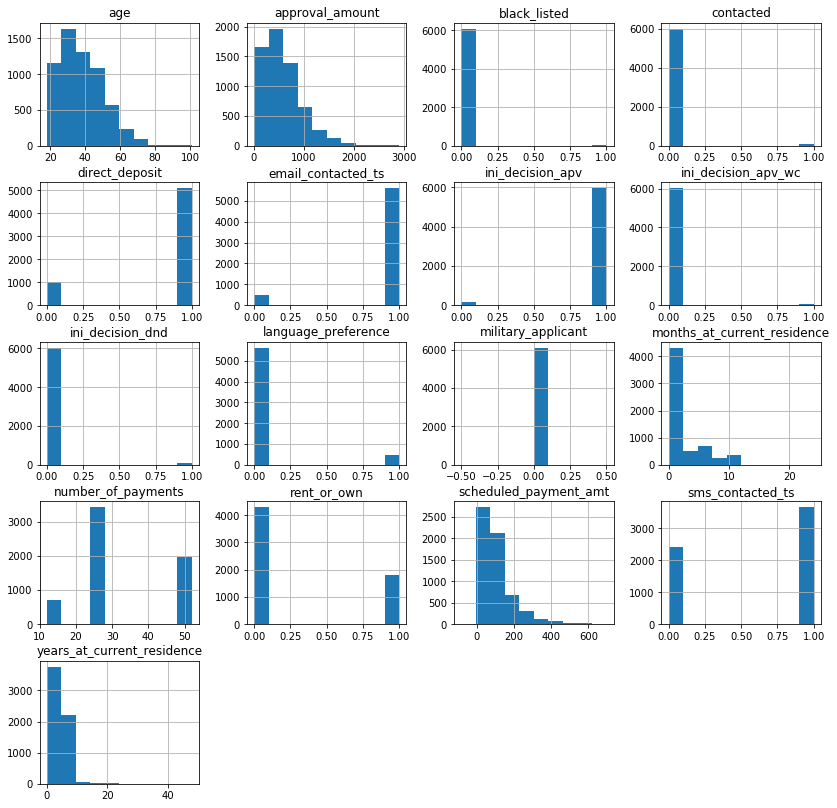

In [21]:
processed_data.hist(figsize=(14,14))
plt.show()

# Se normaliza el dataset
La normalizacion de los datos es muy importante para algoritmos de clasificación que son sensibles a datos que no siguen una misma distribución

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
values = processed_data.values
scalar = MinMaxScaler(feature_range=(0, 1))
scalar = scalar.fit(values)
normalizeData = scalar.transform(values)
normalizeData[:3]

array([[ 0.08529006,  0.        ,  0.        ,  1.        ,  0.        ,
         0.04166667,  0.04166667,  1.        ,  0.        ,  0.        ,
         0.        ,  0.13074644,  1.        ,  0.15662651,  1.        ,
         0.        ,  0.        ],
       [ 0.0265884 ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.02083333,  1.        ,  0.        ,  0.        ,
         0.        ,  0.14875037,  0.35      ,  0.03614458,  1.        ,
         0.        ,  0.        ],
       [ 0.32907459,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.02083333,  0.        ,  0.        ,  1.        ,
         0.        ,  0.64965441,  0.        ,  0.30120482,  1.        ,
         0.        ,  0.        ]])

In [24]:
normalize_data = pd.DataFrame(normalizeData,columns=processed_data.columns)

In [25]:
normalize_data.tail()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
6090         0.111188        0.0                 1.0               1.0   
6091         0.377417        0.0                 1.0               1.0   
6092         0.170925        0.0                 1.0               1.0   
6093         0.352555        0.0                 1.0               1.0   
6094         0.134323        0.0                 1.0               1.0   

      rent_or_own  months_at_current_residence  years_at_current_residence  \
6090          0.0                     0.375000                    0.062500   
6091          0.0                     0.250000                    0.125000   
6092          0.0                     0.000000                    0.020833   
6093          1.0                     0.000000                    0.041667   
6094          1.0                     0.458333                    0.125000   

      direct_deposit  black_listed  language_preference  military_applicant  \
6090             1.0           0.0                  0.0                 0.0   
6091             0.0           0.0                  0.0                 0.0   
6092             1.0           0.0                  0.0                 0.0   
6093             1.0           0.0                  0.0                 0.0   
6094             1.0           0.0                  0.0                 0.0   

      scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
6090               0.131413                1.00  0.132530               1.0   
6091               0.196889                1.00  0.180723               1.0   
6092               0.211815                0.35  0.096386               1.0   
6093               0.307593                0.35  0.180723               1.0   
6094               0.188567                0.35  0.096386               1.0   

      ini_decision_apv_wc  ini_decision_dnd  
6090                  0.0               0.0  
6091                  0.0               0.0  
6092                  0.0               0.0  
6093                  0.0               0.0  
6094                  0.0               0.0

In [26]:
normalize_data.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0         0.085290        0.0                 0.0               1.0   
1         0.026588        0.0                 1.0               0.0   
2         0.329075        0.0                 1.0               1.0   
3         0.002072        0.0                 0.0               1.0   
4         0.085290        0.0                 1.0               1.0   

   rent_or_own  months_at_current_residence  years_at_current_residence  \
0          0.0                     0.041667                    0.041667   
1          0.0                     0.000000                    0.020833   
2          0.0                     0.000000                    0.020833   
3          0.0                     0.458333                    0.000000   
4          0.0                     0.000000                    0.125000   

   direct_deposit  black_listed  language_preference  military_applicant  \
0             1.0           0.0                  0.0                 0.0   
1             1.0           0.0                  0.0                 0.0   
2             0.0           0.0                  1.0                 0.0   
3             0.0           0.0                  0.0                 0.0   
4             1.0           0.0                  0.0                 0.0   

   scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
0               0.130746                1.00  0.156627               1.0   
1               0.148750                0.35  0.036145               1.0   
2               0.649654                0.00  0.301205               1.0   
3               0.129862                0.35  0.180723               1.0   
4               0.219086                0.35  0.240964               1.0   

   ini_decision_apv_wc  ini_decision_dnd  
0                  0.0               0.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  0.0               0.0  
4                  0.0               0.0

# Graficamos de Nuevo
Se grafican de nuevo las columnas para revisar que la normalizacion este adecuada,
Al observar la graficacion vemos que los datos siguen la misma distribución pero ahora de 0 a 1

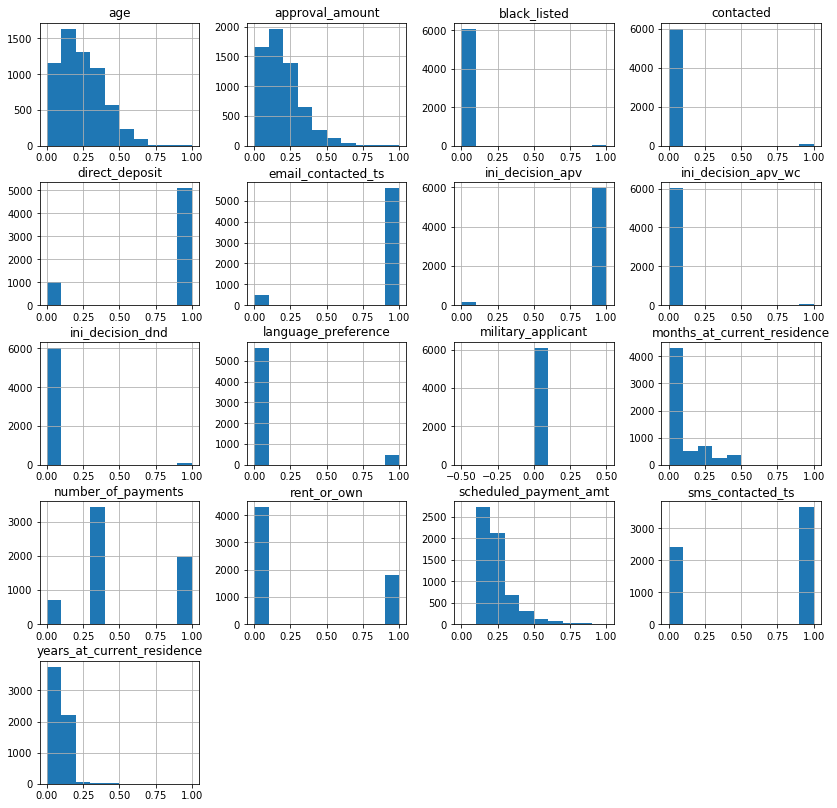

In [27]:
normalize_data.hist(figsize=(14,14))
plt.show()

# Se realiza balance de datos

Se realiza sustitución de datos booleanos

In [28]:
dfp_target.redeem_ts = dfp_target.redeem_ts.replace({True:1,False:0})

In [29]:
dfp_target[(dfp_target['redeem_ts']==1)].shape

(2595, 1)

In [30]:
dfp_target[(dfp_target['redeem_ts']==0)].shape

(3500, 1)

In [31]:
import numpy as np
redeem_true_index = np.where(dfp_target['redeem_ts']==1)[0]
redeem_false_index = np.where(dfp_target['redeem_ts']==0)[0]
redeem_true = normalize_data.loc[redeem_true_index]
redeem_false = normalize_data.loc[redeem_false_index[:len(redeem_true_index)]]
balance_data = pd.concat([redeem_true,redeem_false])

Se comprueba que la divición se haya realizado correctamente

In [32]:
normalize_data.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0         0.085290        0.0                 0.0               1.0   
1         0.026588        0.0                 1.0               0.0   
2         0.329075        0.0                 1.0               1.0   
3         0.002072        0.0                 0.0               1.0   
4         0.085290        0.0                 1.0               1.0   

   rent_or_own  months_at_current_residence  years_at_current_residence  \
0          0.0                     0.041667                    0.041667   
1          0.0                     0.000000                    0.020833   
2          0.0                     0.000000                    0.020833   
3          0.0                     0.458333                    0.000000   
4          0.0                     0.000000                    0.125000   

   direct_deposit  black_listed  language_preference  military_applicant  \
0             1.0           0.0                  0.0                 0.0   
1             1.0           0.0                  0.0                 0.0   
2             0.0           0.0                  1.0                 0.0   
3             0.0           0.0                  0.0                 0.0   
4             1.0           0.0                  0.0                 0.0   

   scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
0               0.130746                1.00  0.156627               1.0   
1               0.148750                0.35  0.036145               1.0   
2               0.649654                0.00  0.301205               1.0   
3               0.129862                0.35  0.180723               1.0   
4               0.219086                0.35  0.240964               1.0   

   ini_decision_apv_wc  ini_decision_dnd  
0                  0.0               0.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  0.0               0.0  
4                  0.0               0.0

In [33]:
dfp_target.head()

redeem_ts
0          1
1          1
2          1
3          1
4          1

In [34]:
redeem_false.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
2595         0.277279        0.0                 0.0               0.0   
2596         0.065608        0.0                 1.0               1.0   
2597         0.080110        0.0                 1.0               1.0   
2598         0.087017        0.0                 1.0               1.0   
2599         0.236533        0.0                 1.0               1.0   

      rent_or_own  months_at_current_residence  years_at_current_residence  \
2595          1.0                     0.000000                    0.125000   
2596          0.0                     0.166667                    0.062500   
2597          1.0                     0.000000                    0.020833   
2598          1.0                     0.458333                    0.125000   
2599          0.0                     0.000000                    0.041667   

      direct_deposit  black_listed  language_preference  military_applicant  \
2595             1.0           0.0                  0.0                 0.0   
2596             1.0           0.0                  0.0                 0.0   
2597             1.0           0.0                  0.0                 0.0   
2598             0.0           0.0                  0.0                 0.0   
2599             1.0           0.0                  0.0                 0.0   

      scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
2595               0.273714                0.35  0.156627               1.0   
2596               0.245515                0.35  0.277108               1.0   
2597               0.312350                0.35  0.168675               1.0   
2598               0.146532                0.35  0.289157               1.0   
2599               0.221612                0.35  0.289157               1.0   

      ini_decision_apv_wc  ini_decision_dnd  
2595                  0.0               0.0  
2596                  0.0               0.0  
2597                  0.0               0.0  
2598                  0.0               0.0  
2599                  0.0               0.0

Vemos el dataset balanceado

In [35]:
balance_data.shape

(5190, 17)

Create labels

In [36]:
redeem = dfp_target[(dfp_target['redeem_ts']==1)]
noRedeem = dfp_target[(dfp_target['redeem_ts']==0)]
labels = pd.concat([redeem,noRedeem[:redeem.shape[0]]])
print(labels)

      redeem_ts
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
10            1
11            1
12            1
13            1
14            1
15            1
16            1
17            1
18            1
19            1
20            1
21            1
22            1
23            1
24            1
25            1
26            1
27            1
28            1
29            1
...         ...
2565          0
2566          0
2567          0
2568          0
2569          0
2570          0
2571          0
2572          0
2573          0
2574          0
2575          0
2576          0
2577          0
2578          0
2579          0
2580          0
2581          0
2582          0
2583          0
2584          0
2585          0
2586          0
2587          0
2588          0
2589          0
2590          0
2591          0
2592          0
2593          0
2594          0

[5190 r

In [37]:
balance_data.head()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
0         0.085290        0.0                 0.0               1.0   
1         0.026588        0.0                 1.0               0.0   
2         0.329075        0.0                 1.0               1.0   
3         0.002072        0.0                 0.0               1.0   
4         0.085290        0.0                 1.0               1.0   

   rent_or_own  months_at_current_residence  years_at_current_residence  \
0          0.0                     0.041667                    0.041667   
1          0.0                     0.000000                    0.020833   
2          0.0                     0.000000                    0.020833   
3          0.0                     0.458333                    0.000000   
4          0.0                     0.000000                    0.125000   

   direct_deposit  black_listed  language_preference  military_applicant  \
0             1.0           0.0                  0.0                 0.0   
1             1.0           0.0                  0.0                 0.0   
2             0.0           0.0                  1.0                 0.0   
3             0.0           0.0                  0.0                 0.0   
4             1.0           0.0                  0.0                 0.0   

   scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
0               0.130746                1.00  0.156627               1.0   
1               0.148750                0.35  0.036145               1.0   
2               0.649654                0.00  0.301205               1.0   
3               0.129862                0.35  0.180723               1.0   
4               0.219086                0.35  0.240964               1.0   

   ini_decision_apv_wc  ini_decision_dnd  
0                  0.0               0.0  
1                  0.0               0.0  
2                  0.0               0.0  
3                  0.0               0.0  
4                  0.0               0.0

In [38]:
balance_data.tail()

approval_amount  contacted  email_contacted_ts  sms_contacted_ts  \
5185         0.280387        0.0                 1.0               1.0   
5186         0.093232        0.0                 1.0               0.0   
5187         0.174033        0.0                 1.0               1.0   
5188         0.072859        0.0                 1.0               1.0   
5189         0.187845        0.0                 1.0               1.0   

      rent_or_own  months_at_current_residence  years_at_current_residence  \
5185          0.0                     0.000000                    0.041667   
5186          0.0                     0.000000                    0.062500   
5187          1.0                     0.000000                    0.125000   
5188          0.0                     0.250000                    0.000000   
5189          0.0                     0.041667                    0.000000   

      direct_deposit  black_listed  language_preference  military_applicant  \
5185             1.0           0.0                  0.0                 0.0   
5186             1.0           0.0                  0.0                 0.0   
5187             1.0           0.0                  0.0                 0.0   
5188             1.0           0.0                  0.0                 0.0   
5189             1.0           0.0                  0.0                 0.0   

      scheduled_payment_amt  number_of_payments       age  ini_decision_apv  \
5185               0.301899                0.35  0.349398               1.0   
5186               0.181655                0.35  0.337349               1.0   
5187               0.292320                0.00  0.240964               1.0   
5188               0.204775                0.35  0.144578               1.0   
5189               0.219330                0.35  0.144578               1.0   

      ini_decision_apv_wc  ini_decision_dnd  
5185                  0.0               0.0  
5186                  0.0               0.0  
5187                  0.0               0.0  
5188                  0.0               0.0  
5189                  0.0               0.0

# Relaciones para visualizaciones de datos 

Pare este caso se utilizara el dataset no normalizado

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [40]:
def plotPoints(data,indexT,indexF,xName,yName):
    X = np.array(data[[xName,yName]])
    redeem = X[indexT]
    noRedeem = X[indexF]
    plt.scatter([s[0] for s in redeem], [s[1] for s in redeem], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0] for s in noRedeem], [s[1] for s in noRedeem], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.show()
    

In [41]:
def plotRelationsWithColumns(data,indexT,indexF):
    columns = data.columns
    for i in columns:
        for k in columns:
            if (i != k):
                print("Variables:",k,i)
                plotPoints(data,indexT,indexF[:len(indexT)],i,k)
    

In [42]:
withOutBalance = pd.DataFrame(processed_data.values,columns=processed_data.columns)
redeem_trueNN = withOutBalance.loc[redeem_true_index]
redeem_falseNN = withOutBalance.loc[redeem_false_index[:redeem_true_index.shape[0]]]
balance_data_no_norm = pd.concat([redeem_trueNN,redeem_falseNN])

balance_data_no_norm.shape

(5190, 17)

('Variables:', 'contacted', 'approval_amount')


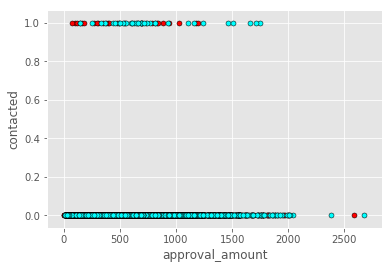

('Variables:', 'email_contacted_ts', 'approval_amount')


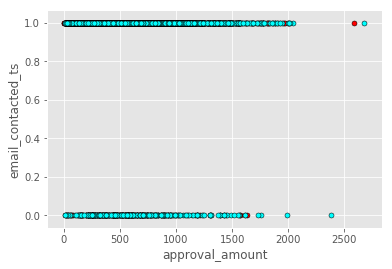

('Variables:', 'sms_contacted_ts', 'approval_amount')


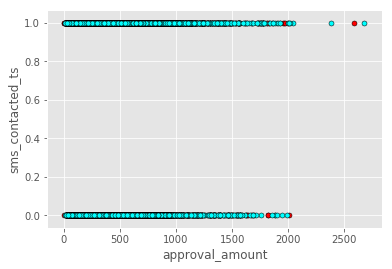

('Variables:', 'rent_or_own', 'approval_amount')


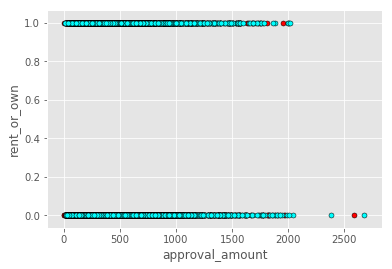

('Variables:', 'months_at_current_residence', 'approval_amount')


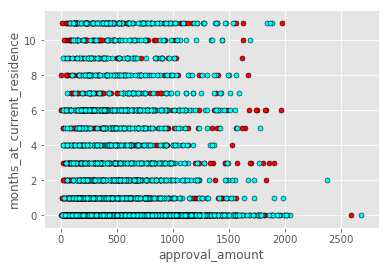

('Variables:', 'years_at_current_residence', 'approval_amount')


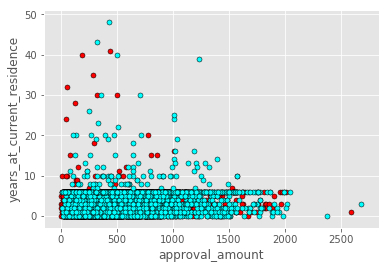

('Variables:', 'direct_deposit', 'approval_amount')


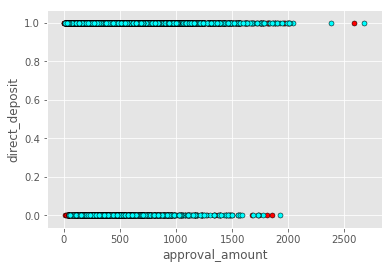

('Variables:', 'black_listed', 'approval_amount')


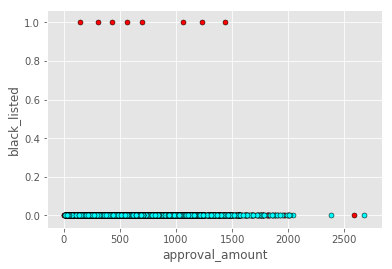

('Variables:', 'language_preference', 'approval_amount')


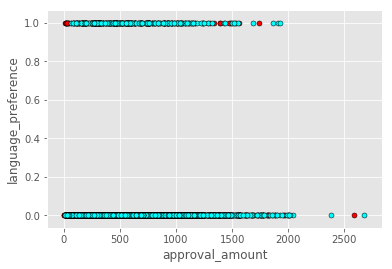

('Variables:', 'military_applicant', 'approval_amount')


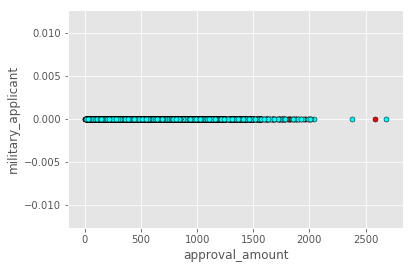

('Variables:', 'scheduled_payment_amt', 'approval_amount')


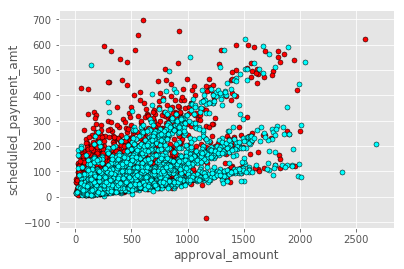

('Variables:', 'number_of_payments', 'approval_amount')


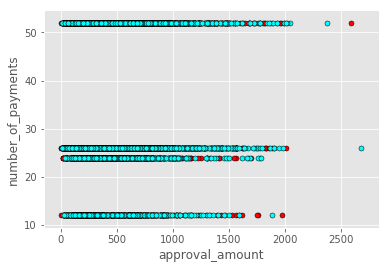

('Variables:', 'age', 'approval_amount')


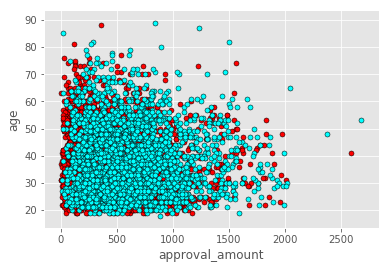

('Variables:', 'ini_decision_apv', 'approval_amount')


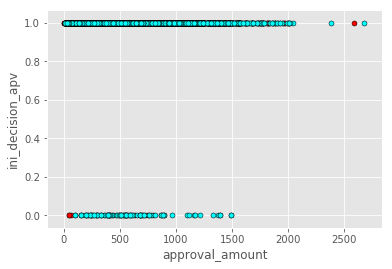

('Variables:', 'ini_decision_apv_wc', 'approval_amount')


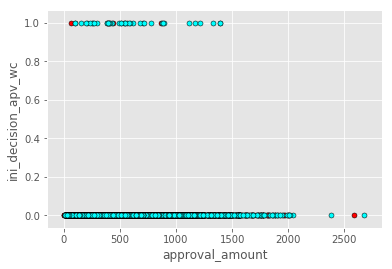

('Variables:', 'ini_decision_dnd', 'approval_amount')


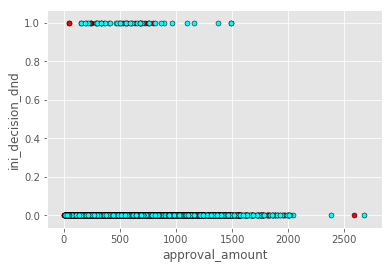

('Variables:', 'approval_amount', 'contacted')


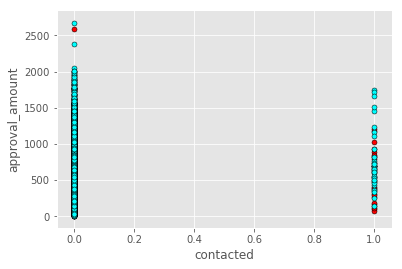

('Variables:', 'email_contacted_ts', 'contacted')


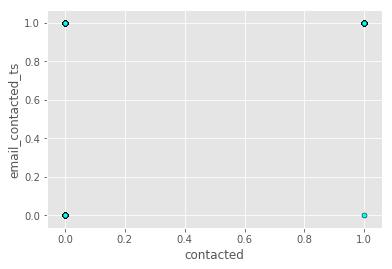

('Variables:', 'sms_contacted_ts', 'contacted')


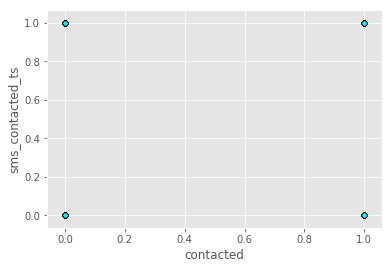

('Variables:', 'rent_or_own', 'contacted')


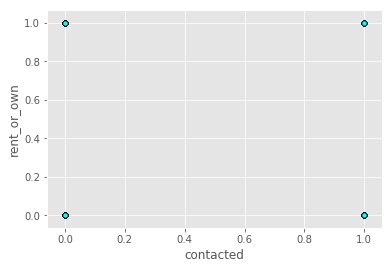

('Variables:', 'months_at_current_residence', 'contacted')


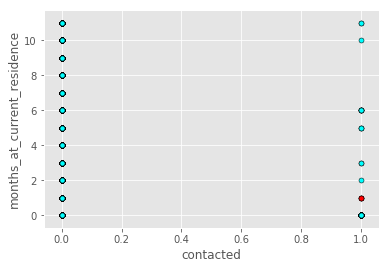

('Variables:', 'years_at_current_residence', 'contacted')


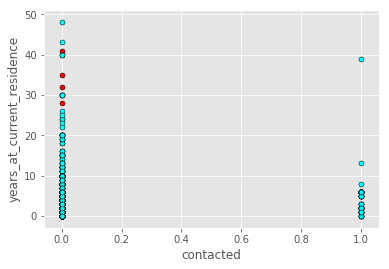

('Variables:', 'direct_deposit', 'contacted')


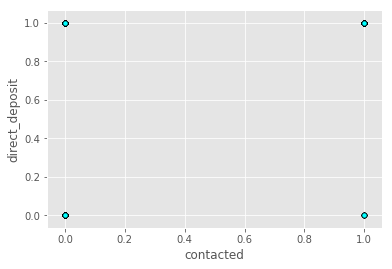

('Variables:', 'black_listed', 'contacted')


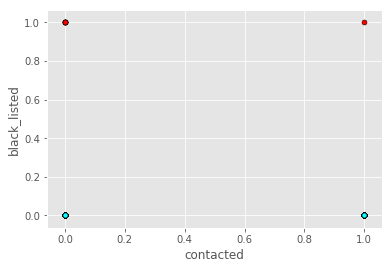

('Variables:', 'language_preference', 'contacted')


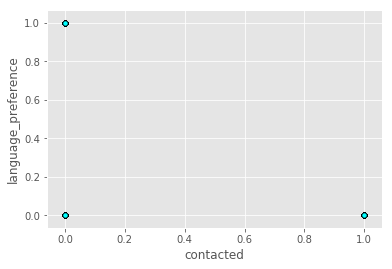

('Variables:', 'military_applicant', 'contacted')


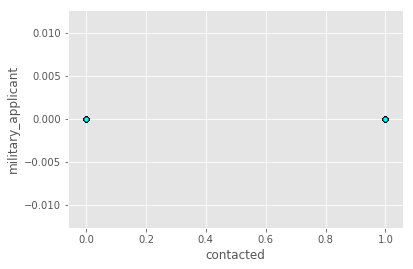

('Variables:', 'scheduled_payment_amt', 'contacted')


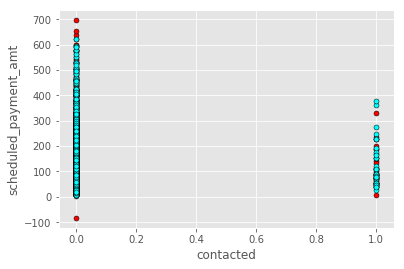

('Variables:', 'number_of_payments', 'contacted')


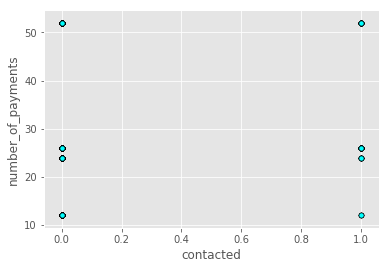

('Variables:', 'age', 'contacted')


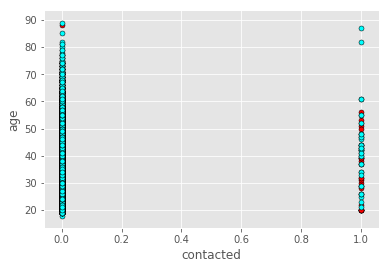

('Variables:', 'ini_decision_apv', 'contacted')


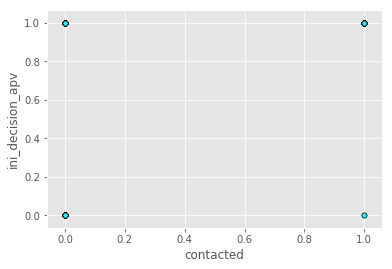

('Variables:', 'ini_decision_apv_wc', 'contacted')


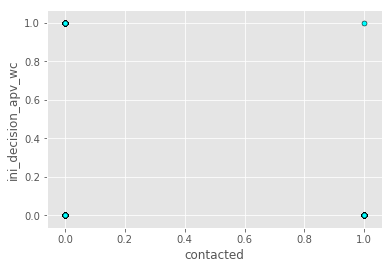

('Variables:', 'ini_decision_dnd', 'contacted')


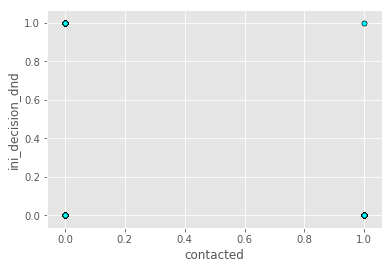

('Variables:', 'approval_amount', 'email_contacted_ts')


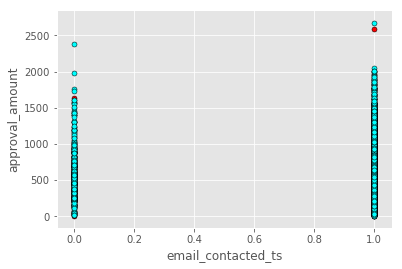

('Variables:', 'contacted', 'email_contacted_ts')


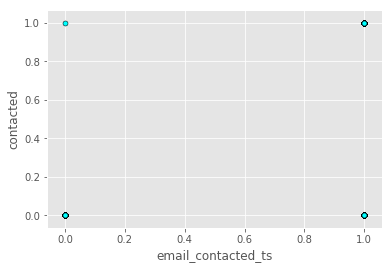

('Variables:', 'sms_contacted_ts', 'email_contacted_ts')


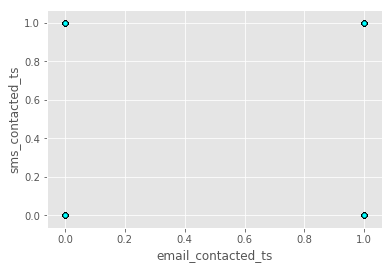

('Variables:', 'rent_or_own', 'email_contacted_ts')


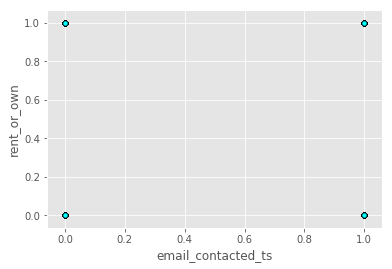

('Variables:', 'months_at_current_residence', 'email_contacted_ts')


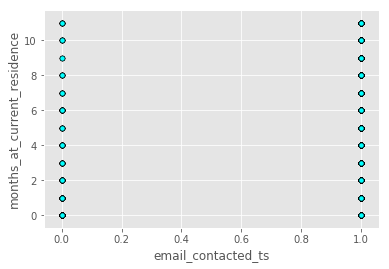

('Variables:', 'years_at_current_residence', 'email_contacted_ts')


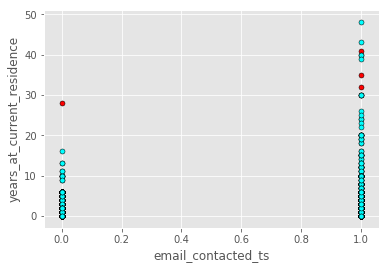

('Variables:', 'direct_deposit', 'email_contacted_ts')


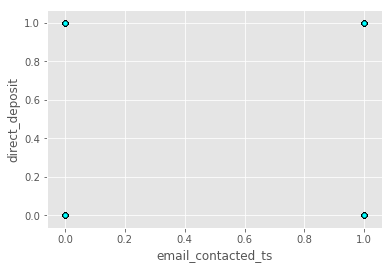

('Variables:', 'black_listed', 'email_contacted_ts')


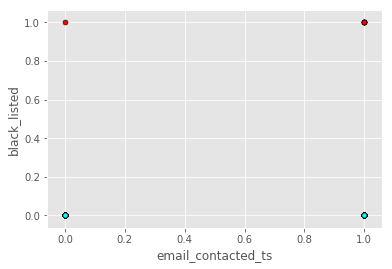

('Variables:', 'language_preference', 'email_contacted_ts')


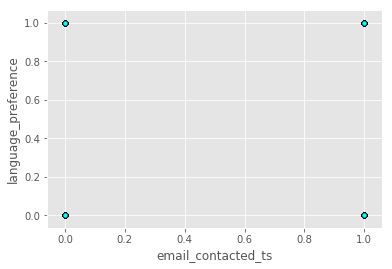

('Variables:', 'military_applicant', 'email_contacted_ts')


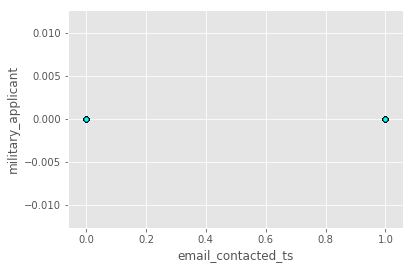

('Variables:', 'scheduled_payment_amt', 'email_contacted_ts')


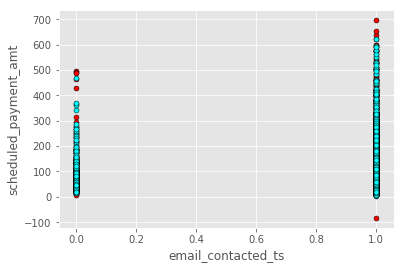

('Variables:', 'number_of_payments', 'email_contacted_ts')


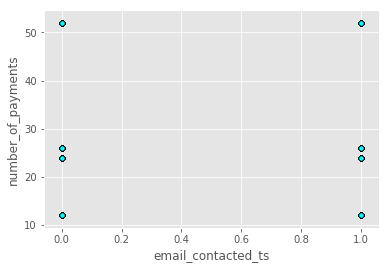

('Variables:', 'age', 'email_contacted_ts')


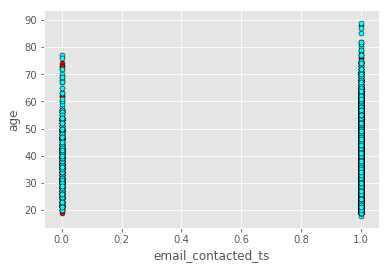

('Variables:', 'ini_decision_apv', 'email_contacted_ts')


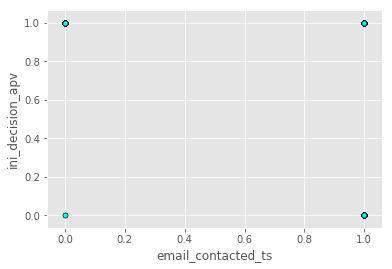

('Variables:', 'ini_decision_apv_wc', 'email_contacted_ts')


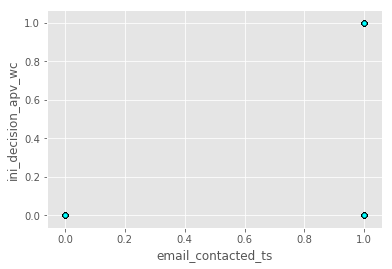

('Variables:', 'ini_decision_dnd', 'email_contacted_ts')


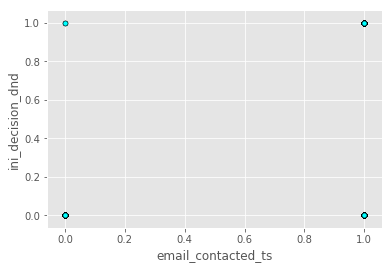

('Variables:', 'approval_amount', 'sms_contacted_ts')


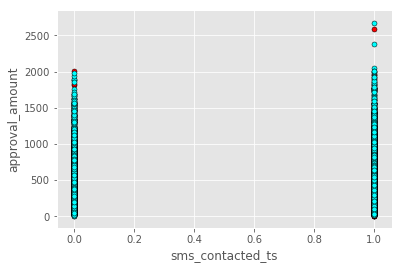

('Variables:', 'contacted', 'sms_contacted_ts')


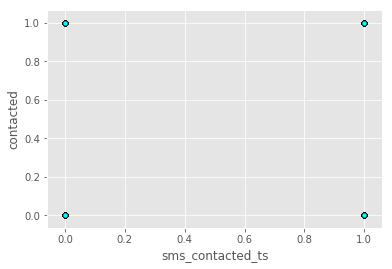

('Variables:', 'email_contacted_ts', 'sms_contacted_ts')


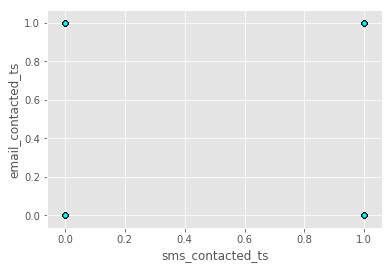

('Variables:', 'rent_or_own', 'sms_contacted_ts')


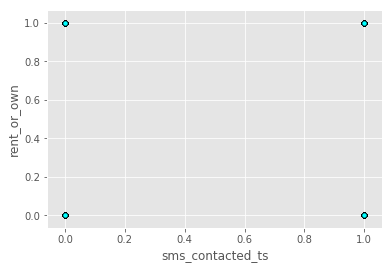

('Variables:', 'months_at_current_residence', 'sms_contacted_ts')


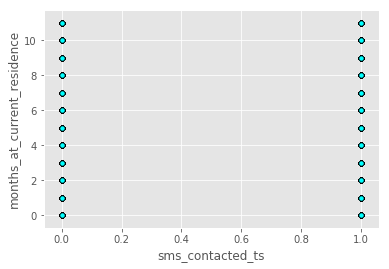

('Variables:', 'years_at_current_residence', 'sms_contacted_ts')


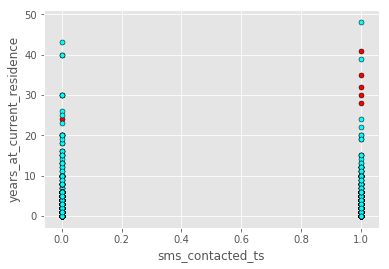

('Variables:', 'direct_deposit', 'sms_contacted_ts')


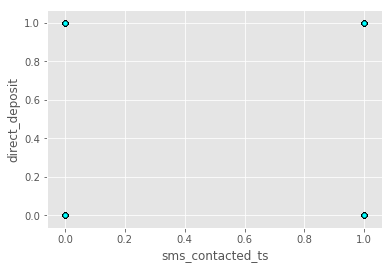

('Variables:', 'black_listed', 'sms_contacted_ts')


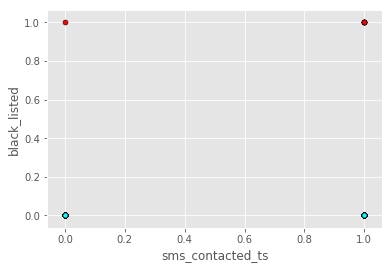

('Variables:', 'language_preference', 'sms_contacted_ts')


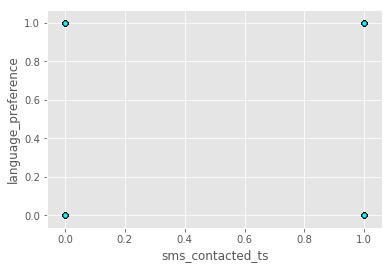

('Variables:', 'military_applicant', 'sms_contacted_ts')


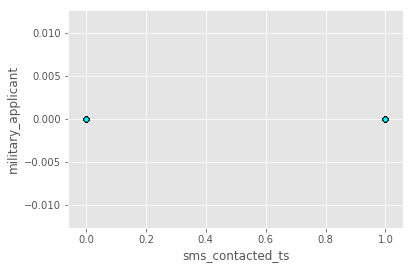

('Variables:', 'scheduled_payment_amt', 'sms_contacted_ts')


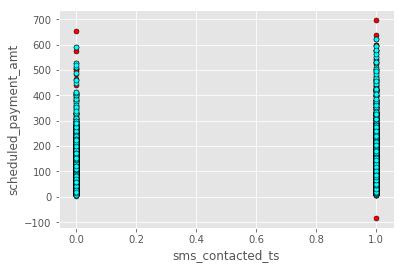

('Variables:', 'number_of_payments', 'sms_contacted_ts')


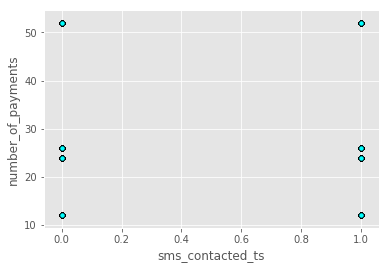

('Variables:', 'age', 'sms_contacted_ts')


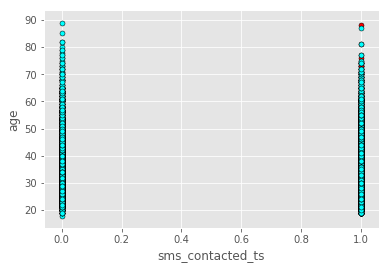

('Variables:', 'ini_decision_apv', 'sms_contacted_ts')


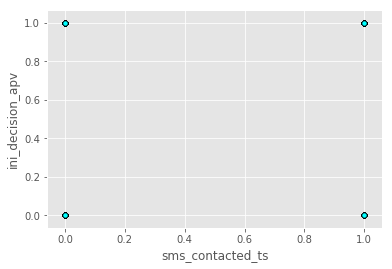

('Variables:', 'ini_decision_apv_wc', 'sms_contacted_ts')


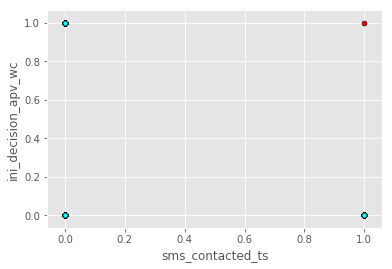

('Variables:', 'ini_decision_dnd', 'sms_contacted_ts')


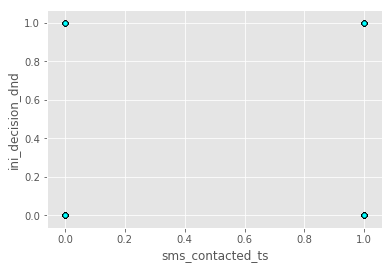

('Variables:', 'approval_amount', 'rent_or_own')


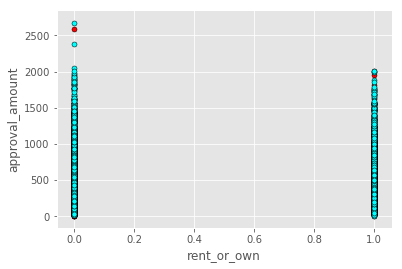

('Variables:', 'contacted', 'rent_or_own')


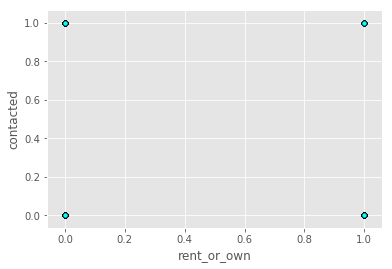

('Variables:', 'email_contacted_ts', 'rent_or_own')


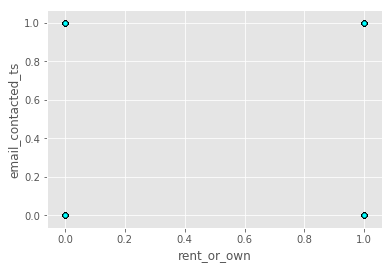

('Variables:', 'sms_contacted_ts', 'rent_or_own')


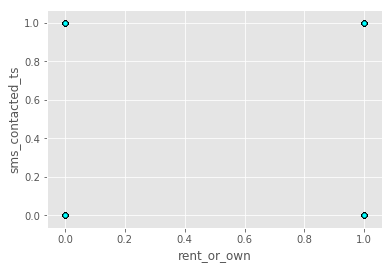

('Variables:', 'months_at_current_residence', 'rent_or_own')


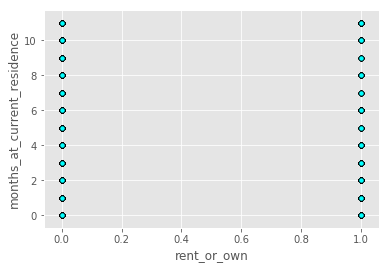

('Variables:', 'years_at_current_residence', 'rent_or_own')


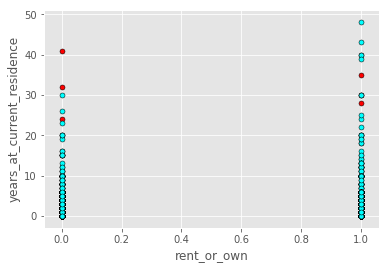

('Variables:', 'direct_deposit', 'rent_or_own')


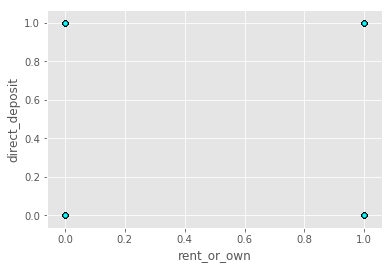

('Variables:', 'black_listed', 'rent_or_own')


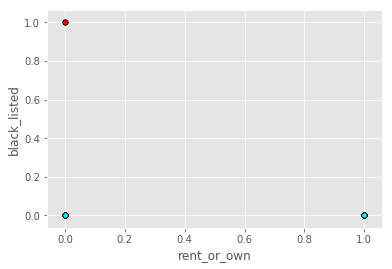

('Variables:', 'language_preference', 'rent_or_own')


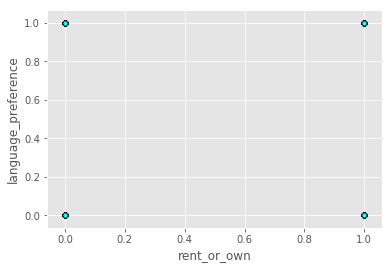

('Variables:', 'military_applicant', 'rent_or_own')


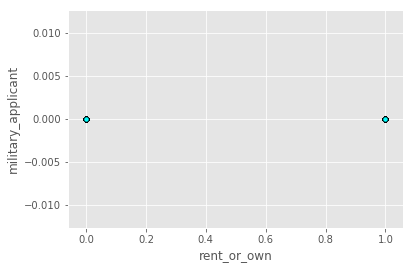

('Variables:', 'scheduled_payment_amt', 'rent_or_own')


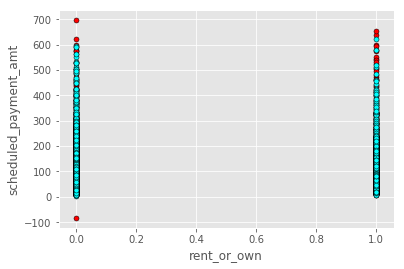

('Variables:', 'number_of_payments', 'rent_or_own')


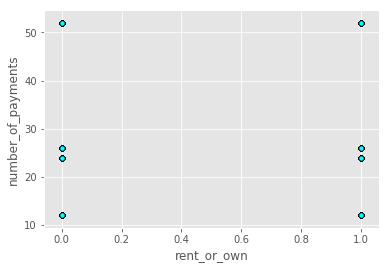

('Variables:', 'age', 'rent_or_own')


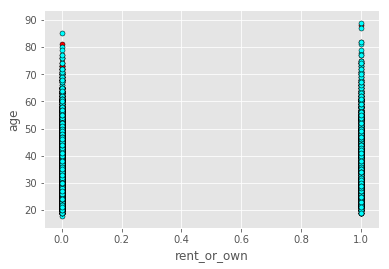

('Variables:', 'ini_decision_apv', 'rent_or_own')


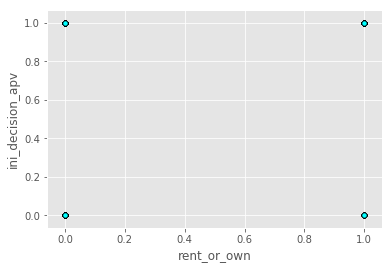

('Variables:', 'ini_decision_apv_wc', 'rent_or_own')


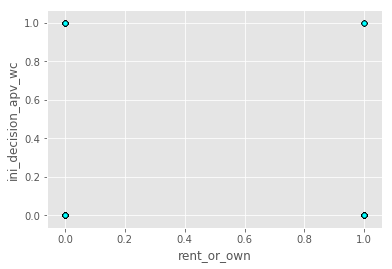

('Variables:', 'ini_decision_dnd', 'rent_or_own')


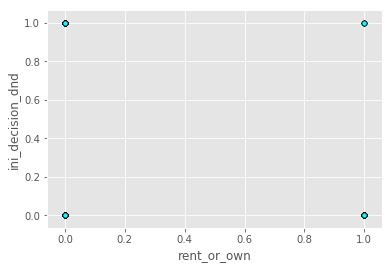

('Variables:', 'approval_amount', 'months_at_current_residence')


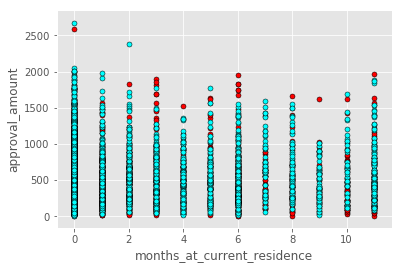

('Variables:', 'contacted', 'months_at_current_residence')


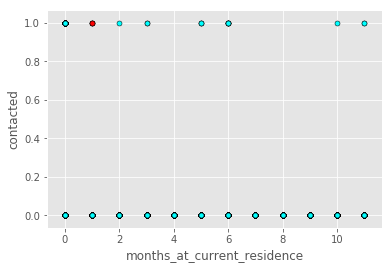

('Variables:', 'email_contacted_ts', 'months_at_current_residence')


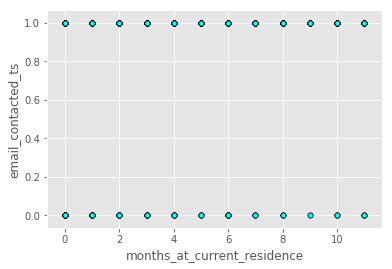

('Variables:', 'sms_contacted_ts', 'months_at_current_residence')


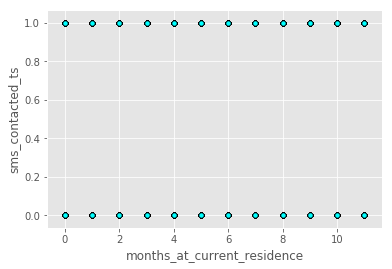

('Variables:', 'rent_or_own', 'months_at_current_residence')


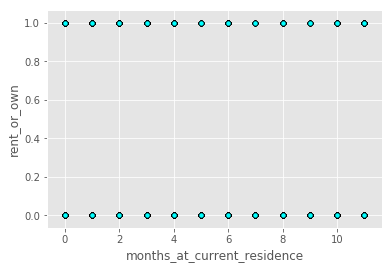

('Variables:', 'years_at_current_residence', 'months_at_current_residence')


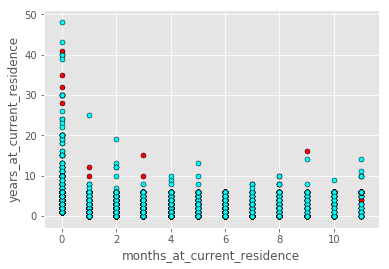

('Variables:', 'direct_deposit', 'months_at_current_residence')


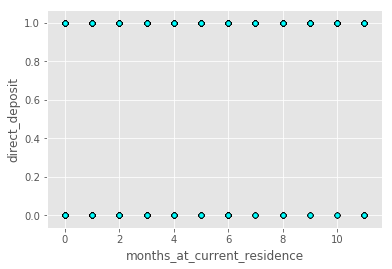

('Variables:', 'black_listed', 'months_at_current_residence')


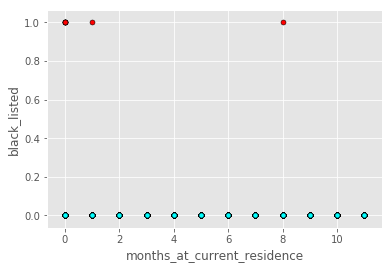

('Variables:', 'language_preference', 'months_at_current_residence')


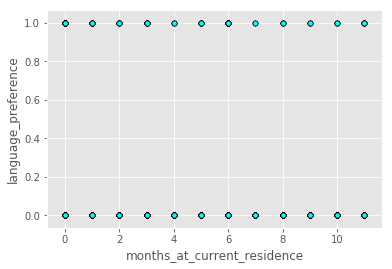

('Variables:', 'military_applicant', 'months_at_current_residence')


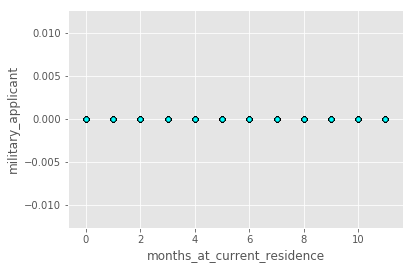

('Variables:', 'scheduled_payment_amt', 'months_at_current_residence')


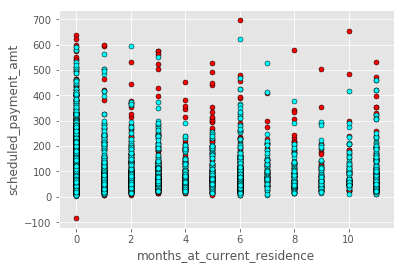

('Variables:', 'number_of_payments', 'months_at_current_residence')


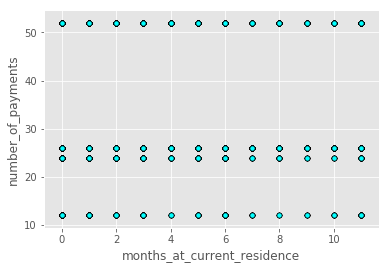

('Variables:', 'age', 'months_at_current_residence')


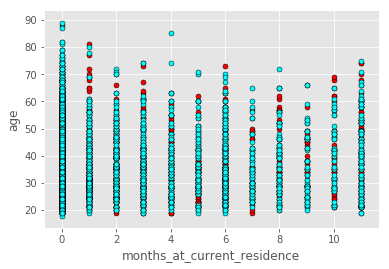

('Variables:', 'ini_decision_apv', 'months_at_current_residence')


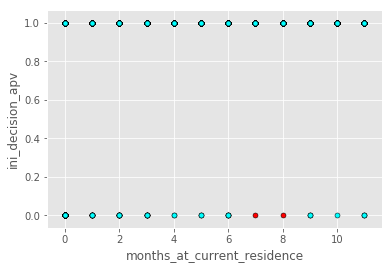

('Variables:', 'ini_decision_apv_wc', 'months_at_current_residence')


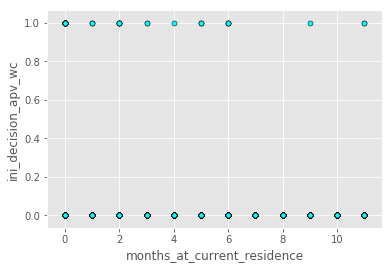

('Variables:', 'ini_decision_dnd', 'months_at_current_residence')


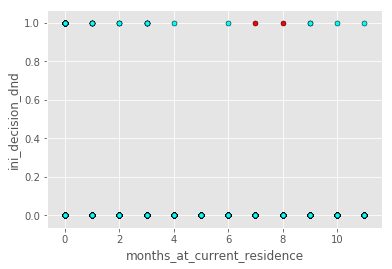

('Variables:', 'approval_amount', 'years_at_current_residence')


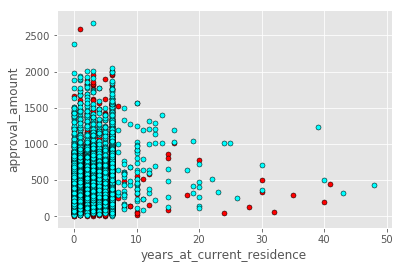

('Variables:', 'contacted', 'years_at_current_residence')


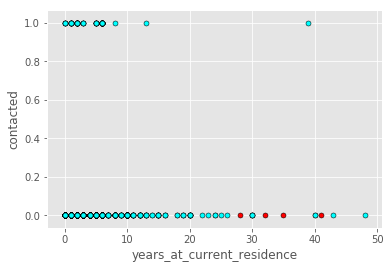

('Variables:', 'email_contacted_ts', 'years_at_current_residence')


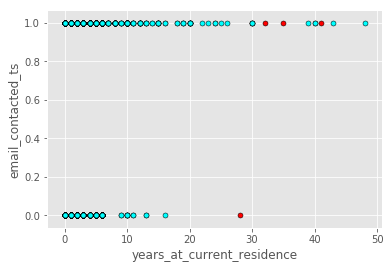

('Variables:', 'sms_contacted_ts', 'years_at_current_residence')


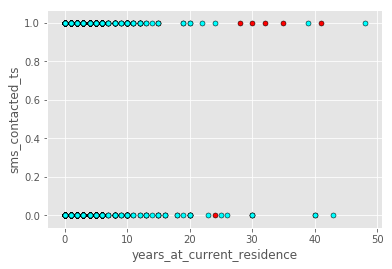

('Variables:', 'rent_or_own', 'years_at_current_residence')


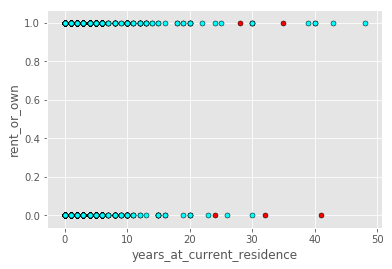

('Variables:', 'months_at_current_residence', 'years_at_current_residence')


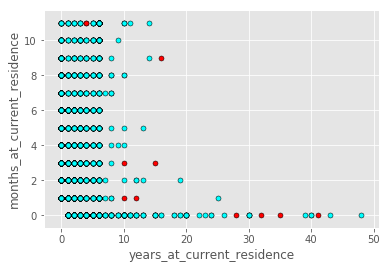

('Variables:', 'direct_deposit', 'years_at_current_residence')


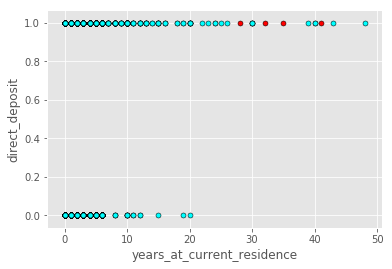

('Variables:', 'black_listed', 'years_at_current_residence')


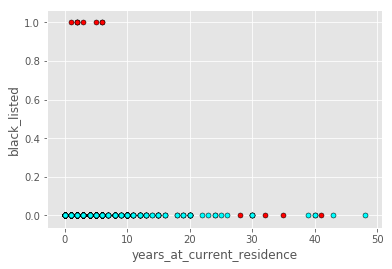

('Variables:', 'language_preference', 'years_at_current_residence')


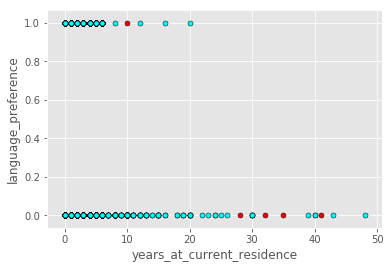

('Variables:', 'military_applicant', 'years_at_current_residence')


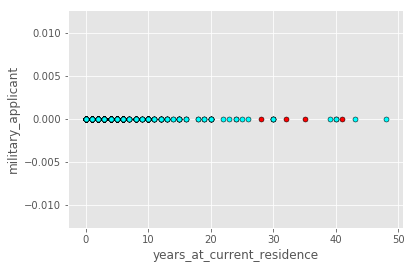

('Variables:', 'scheduled_payment_amt', 'years_at_current_residence')


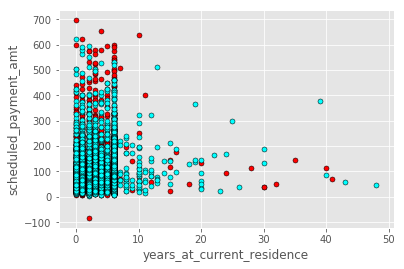

('Variables:', 'number_of_payments', 'years_at_current_residence')


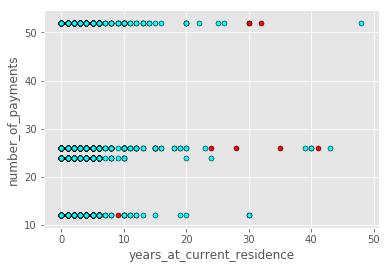

('Variables:', 'age', 'years_at_current_residence')


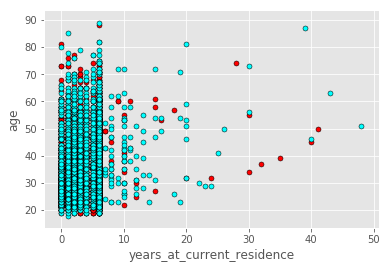

('Variables:', 'ini_decision_apv', 'years_at_current_residence')


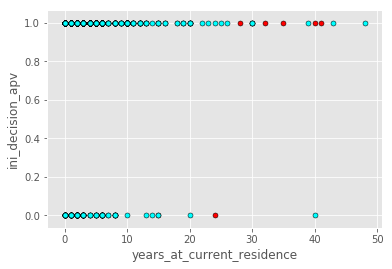

('Variables:', 'ini_decision_apv_wc', 'years_at_current_residence')


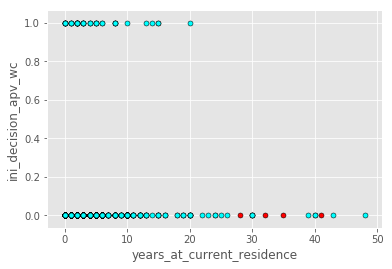

('Variables:', 'ini_decision_dnd', 'years_at_current_residence')


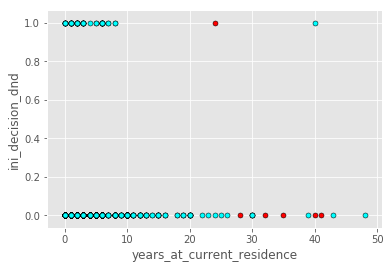

('Variables:', 'approval_amount', 'direct_deposit')


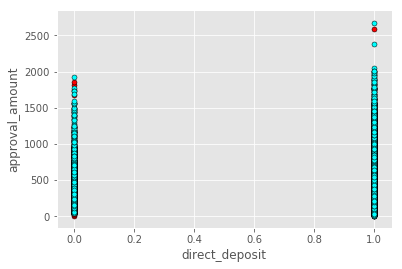

('Variables:', 'contacted', 'direct_deposit')


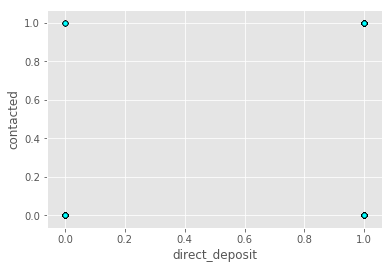

('Variables:', 'email_contacted_ts', 'direct_deposit')


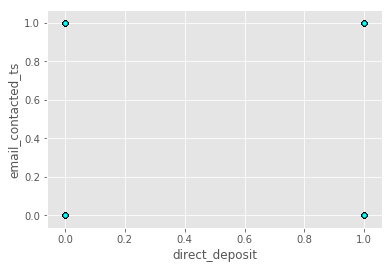

('Variables:', 'sms_contacted_ts', 'direct_deposit')


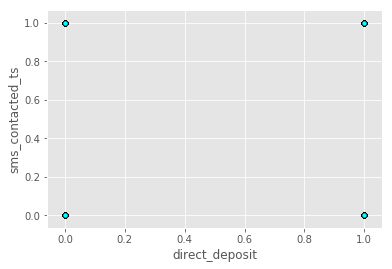

('Variables:', 'rent_or_own', 'direct_deposit')


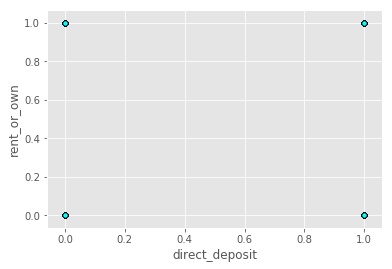

('Variables:', 'months_at_current_residence', 'direct_deposit')


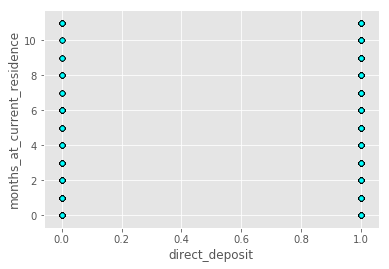

('Variables:', 'years_at_current_residence', 'direct_deposit')


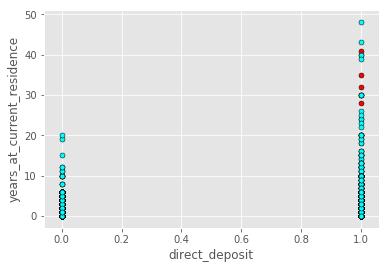

('Variables:', 'black_listed', 'direct_deposit')


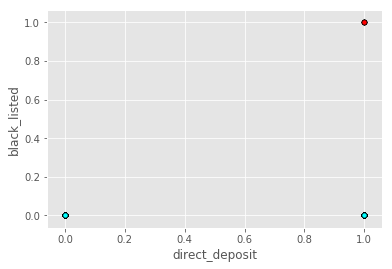

('Variables:', 'language_preference', 'direct_deposit')


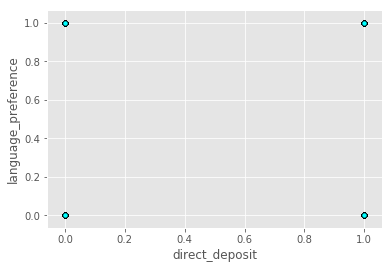

('Variables:', 'military_applicant', 'direct_deposit')


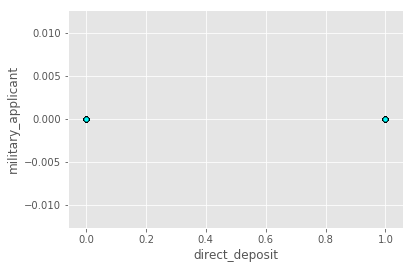

('Variables:', 'scheduled_payment_amt', 'direct_deposit')


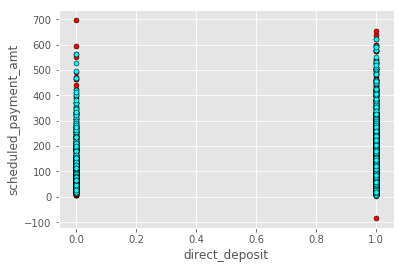

('Variables:', 'number_of_payments', 'direct_deposit')


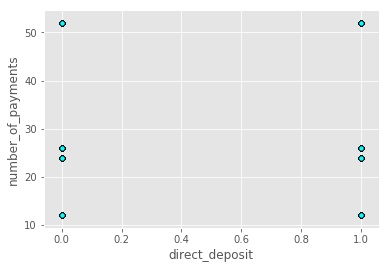

('Variables:', 'age', 'direct_deposit')


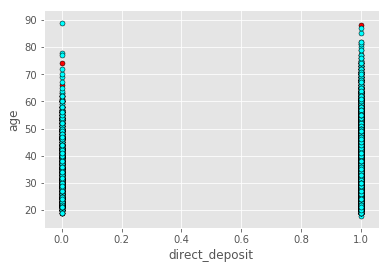

('Variables:', 'ini_decision_apv', 'direct_deposit')


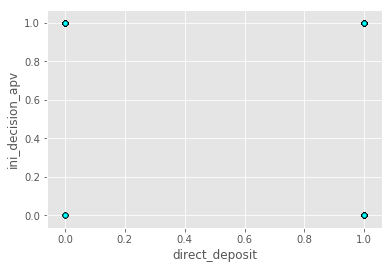

('Variables:', 'ini_decision_apv_wc', 'direct_deposit')


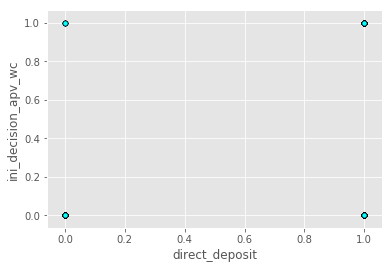

('Variables:', 'ini_decision_dnd', 'direct_deposit')


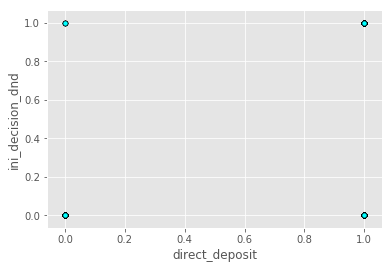

('Variables:', 'approval_amount', 'black_listed')


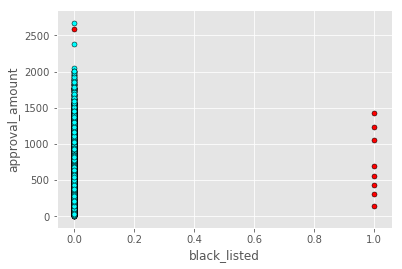

('Variables:', 'contacted', 'black_listed')


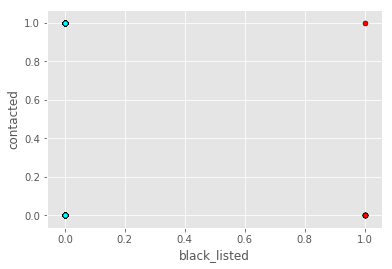

('Variables:', 'email_contacted_ts', 'black_listed')


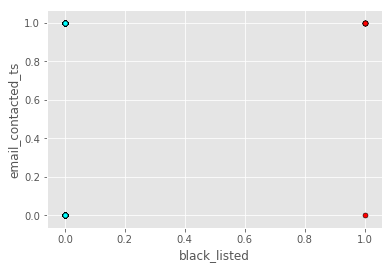

('Variables:', 'sms_contacted_ts', 'black_listed')


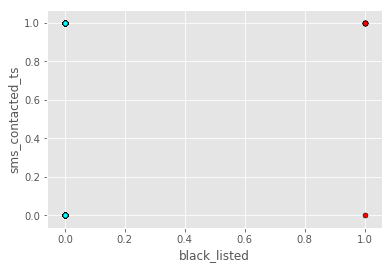

('Variables:', 'rent_or_own', 'black_listed')


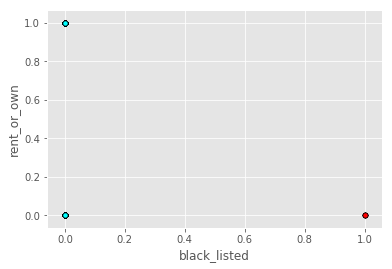

('Variables:', 'months_at_current_residence', 'black_listed')


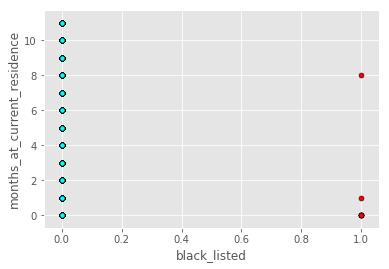

('Variables:', 'years_at_current_residence', 'black_listed')


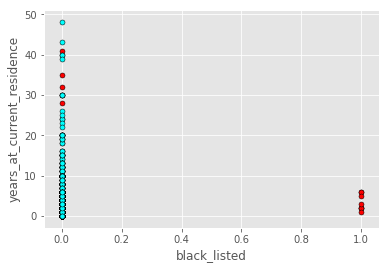

('Variables:', 'direct_deposit', 'black_listed')


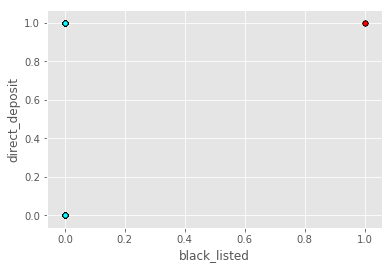

('Variables:', 'language_preference', 'black_listed')


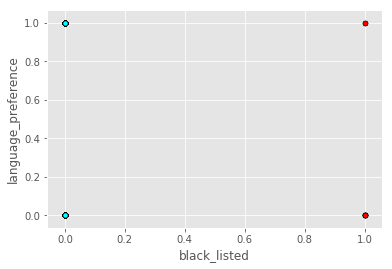

('Variables:', 'military_applicant', 'black_listed')


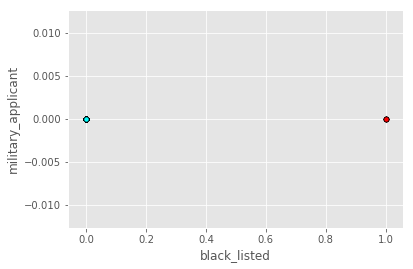

('Variables:', 'scheduled_payment_amt', 'black_listed')


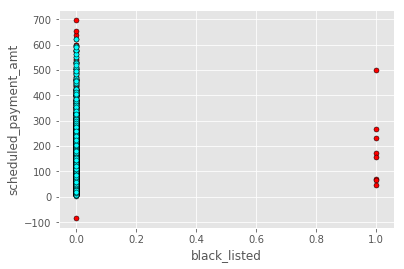

('Variables:', 'number_of_payments', 'black_listed')


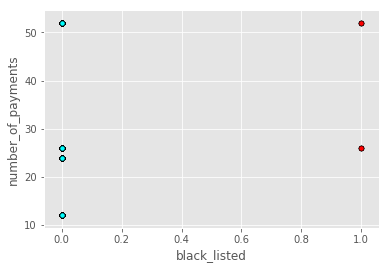

('Variables:', 'age', 'black_listed')


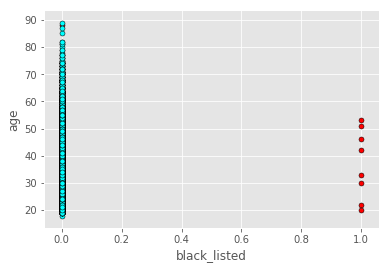

('Variables:', 'ini_decision_apv', 'black_listed')


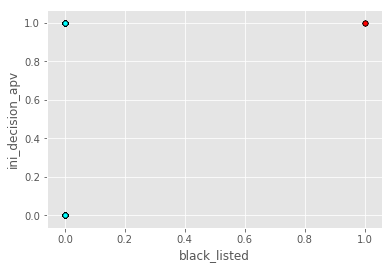

('Variables:', 'ini_decision_apv_wc', 'black_listed')


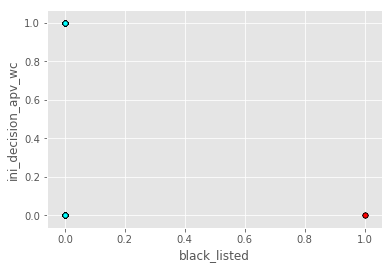

('Variables:', 'ini_decision_dnd', 'black_listed')


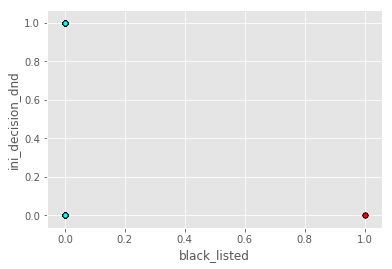

('Variables:', 'approval_amount', 'language_preference')


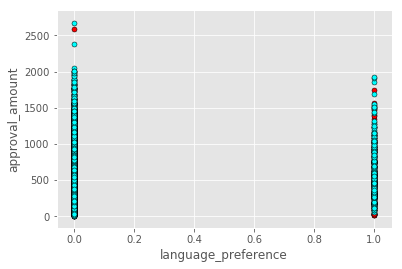

('Variables:', 'contacted', 'language_preference')


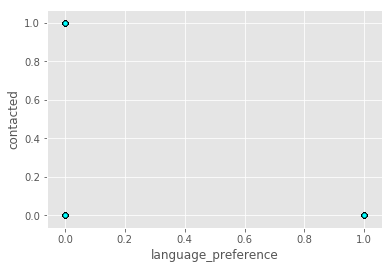

('Variables:', 'email_contacted_ts', 'language_preference')


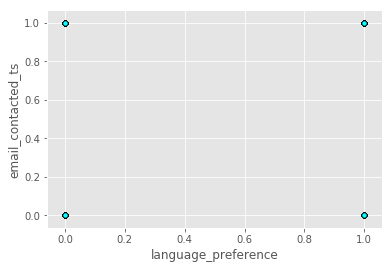

('Variables:', 'sms_contacted_ts', 'language_preference')


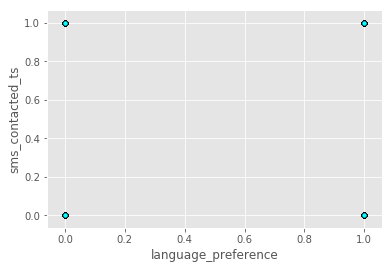

('Variables:', 'rent_or_own', 'language_preference')


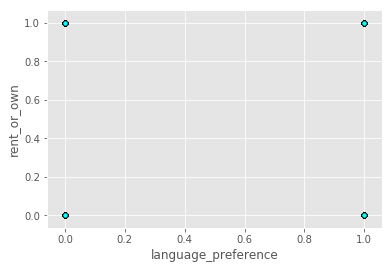

('Variables:', 'months_at_current_residence', 'language_preference')


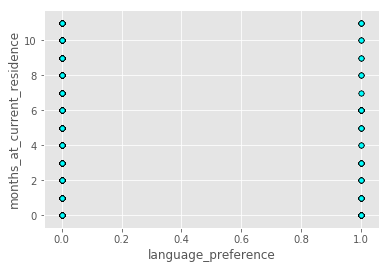

('Variables:', 'years_at_current_residence', 'language_preference')


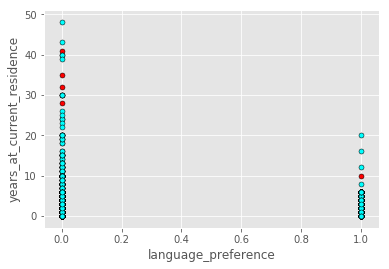

('Variables:', 'direct_deposit', 'language_preference')


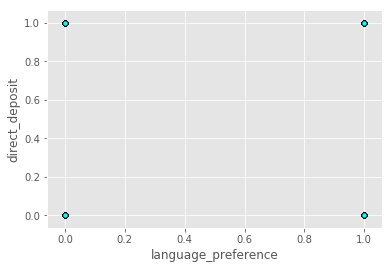

('Variables:', 'black_listed', 'language_preference')


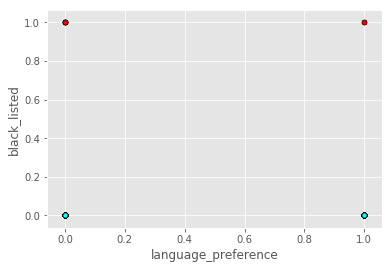

('Variables:', 'military_applicant', 'language_preference')


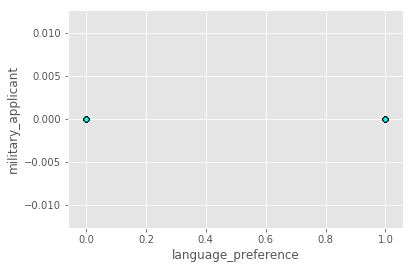

('Variables:', 'scheduled_payment_amt', 'language_preference')


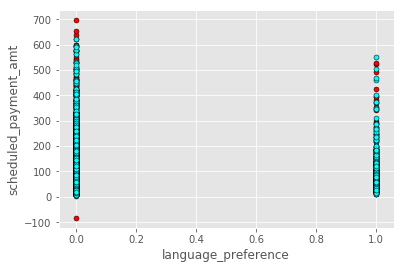

('Variables:', 'number_of_payments', 'language_preference')


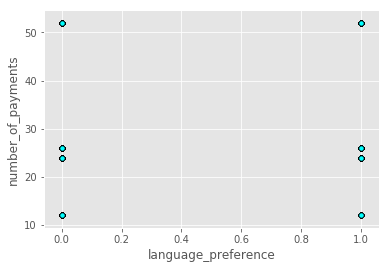

('Variables:', 'age', 'language_preference')


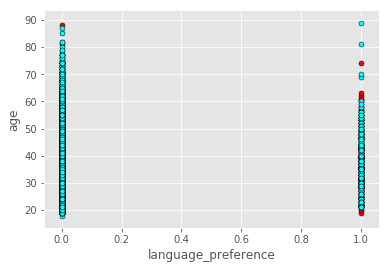

('Variables:', 'ini_decision_apv', 'language_preference')


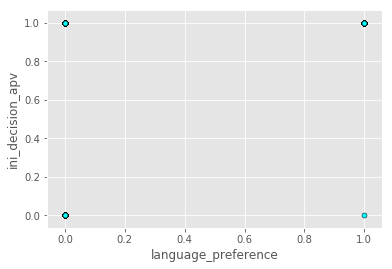

('Variables:', 'ini_decision_apv_wc', 'language_preference')


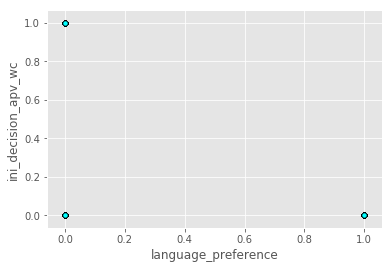

('Variables:', 'ini_decision_dnd', 'language_preference')


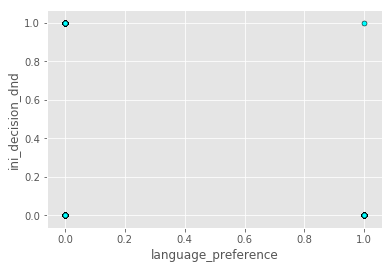

('Variables:', 'approval_amount', 'military_applicant')


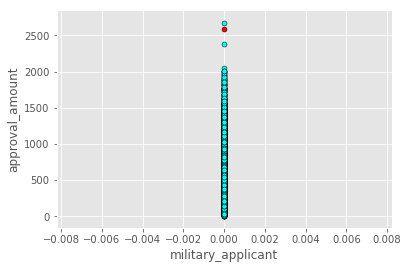

('Variables:', 'contacted', 'military_applicant')


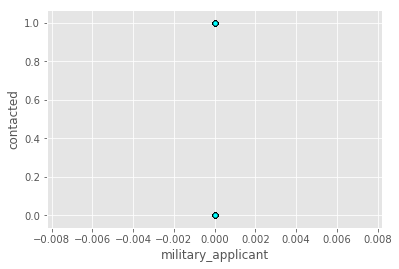

('Variables:', 'email_contacted_ts', 'military_applicant')


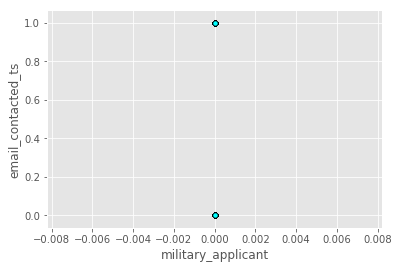

('Variables:', 'sms_contacted_ts', 'military_applicant')


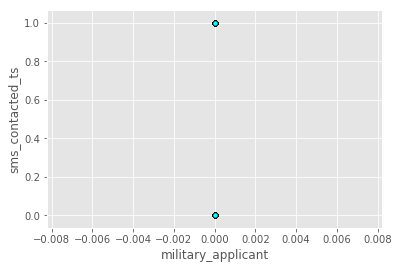

('Variables:', 'rent_or_own', 'military_applicant')


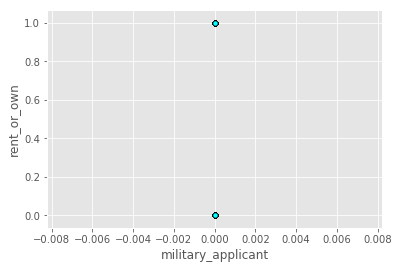

('Variables:', 'months_at_current_residence', 'military_applicant')


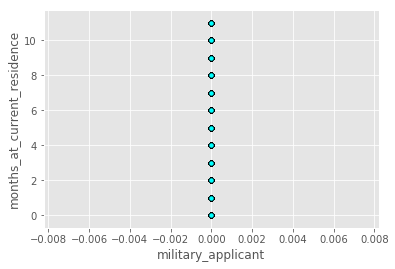

('Variables:', 'years_at_current_residence', 'military_applicant')


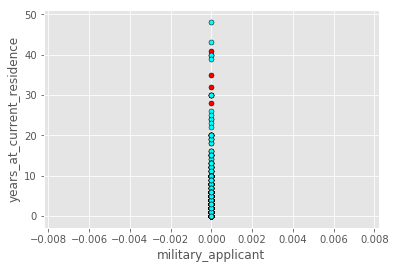

('Variables:', 'direct_deposit', 'military_applicant')


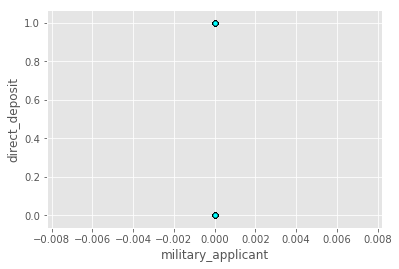

('Variables:', 'black_listed', 'military_applicant')


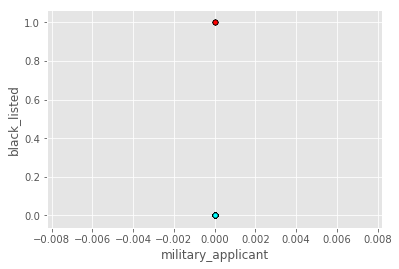

('Variables:', 'language_preference', 'military_applicant')


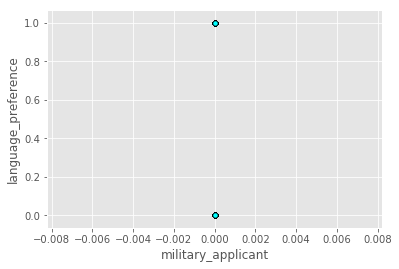

('Variables:', 'scheduled_payment_amt', 'military_applicant')


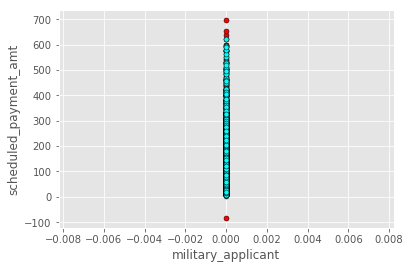

('Variables:', 'number_of_payments', 'military_applicant')


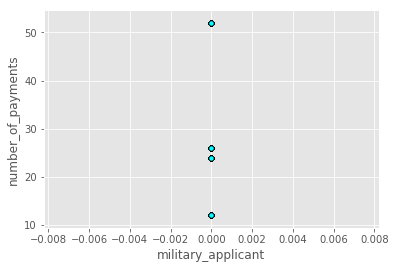

('Variables:', 'age', 'military_applicant')


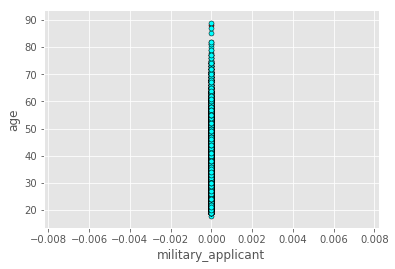

('Variables:', 'ini_decision_apv', 'military_applicant')


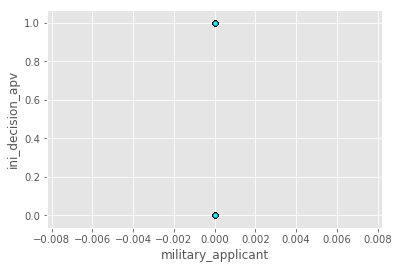

('Variables:', 'ini_decision_apv_wc', 'military_applicant')


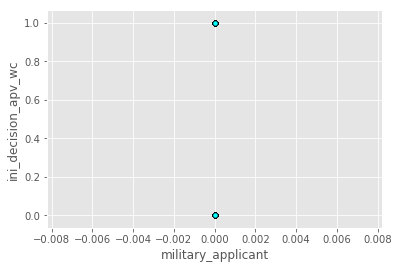

('Variables:', 'ini_decision_dnd', 'military_applicant')


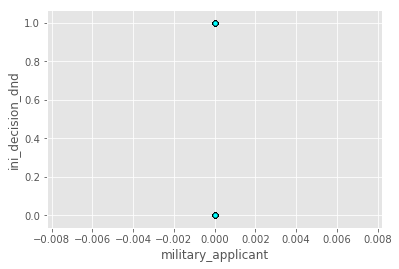

('Variables:', 'approval_amount', 'scheduled_payment_amt')


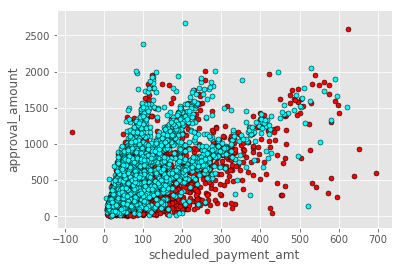

('Variables:', 'contacted', 'scheduled_payment_amt')


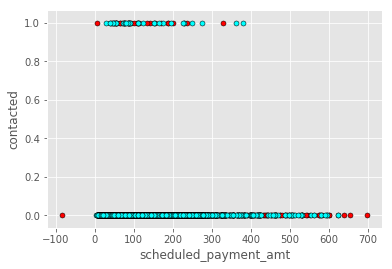

('Variables:', 'email_contacted_ts', 'scheduled_payment_amt')


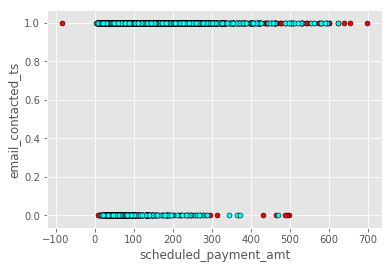

('Variables:', 'sms_contacted_ts', 'scheduled_payment_amt')


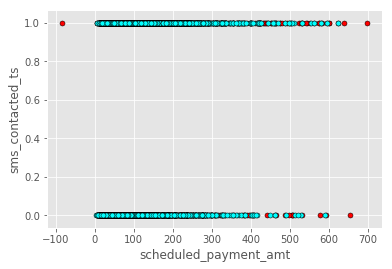

('Variables:', 'rent_or_own', 'scheduled_payment_amt')


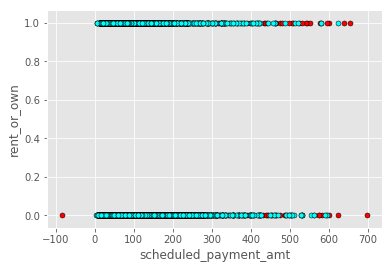

('Variables:', 'months_at_current_residence', 'scheduled_payment_amt')


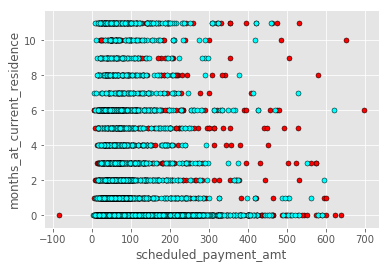

('Variables:', 'years_at_current_residence', 'scheduled_payment_amt')


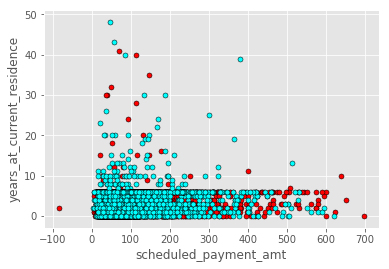

('Variables:', 'direct_deposit', 'scheduled_payment_amt')


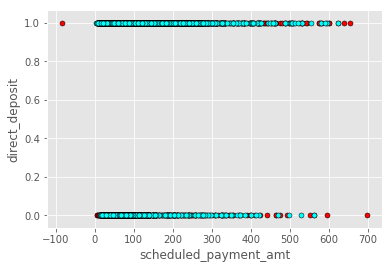

('Variables:', 'black_listed', 'scheduled_payment_amt')


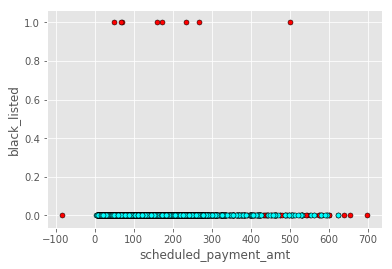

('Variables:', 'language_preference', 'scheduled_payment_amt')


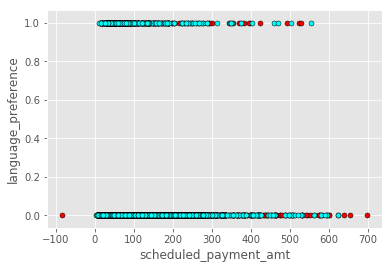

('Variables:', 'military_applicant', 'scheduled_payment_amt')


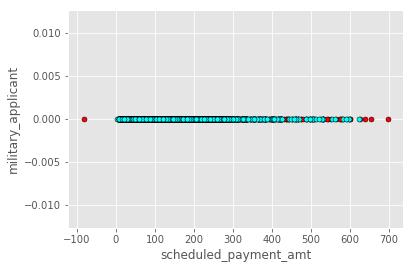

('Variables:', 'number_of_payments', 'scheduled_payment_amt')


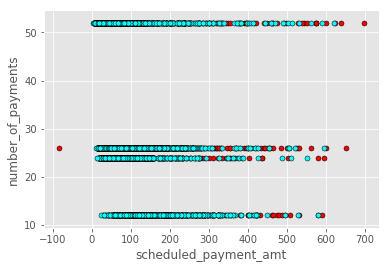

('Variables:', 'age', 'scheduled_payment_amt')


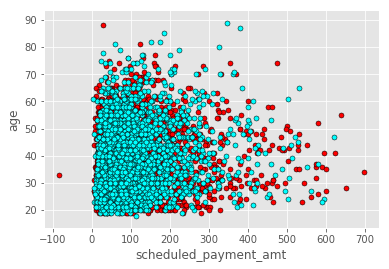

('Variables:', 'ini_decision_apv', 'scheduled_payment_amt')


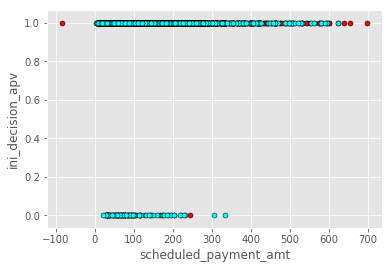

('Variables:', 'ini_decision_apv_wc', 'scheduled_payment_amt')


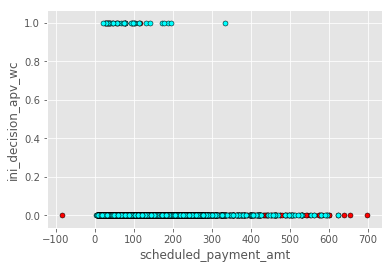

('Variables:', 'ini_decision_dnd', 'scheduled_payment_amt')


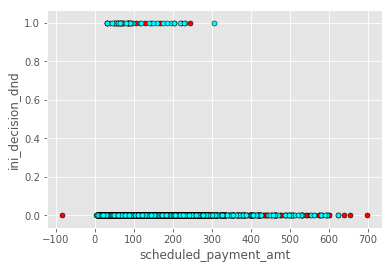

('Variables:', 'approval_amount', 'number_of_payments')


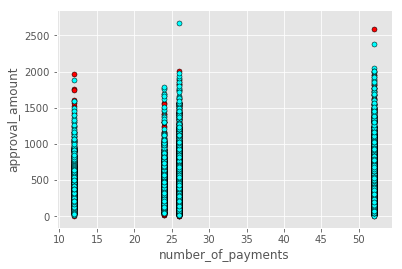

('Variables:', 'contacted', 'number_of_payments')


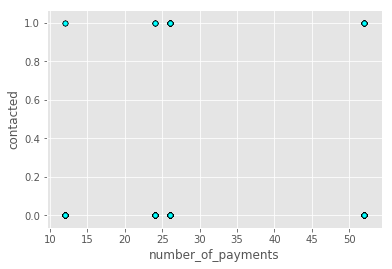

('Variables:', 'email_contacted_ts', 'number_of_payments')


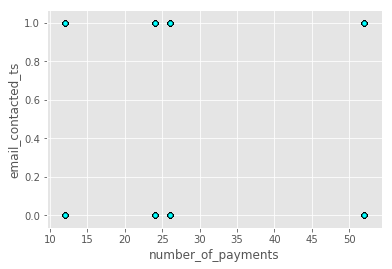

('Variables:', 'sms_contacted_ts', 'number_of_payments')


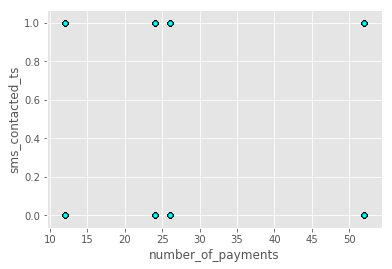

('Variables:', 'rent_or_own', 'number_of_payments')


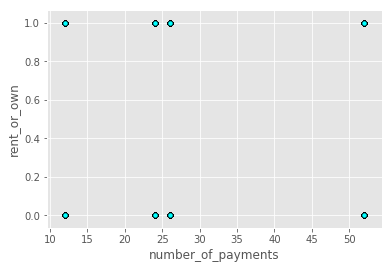

('Variables:', 'months_at_current_residence', 'number_of_payments')


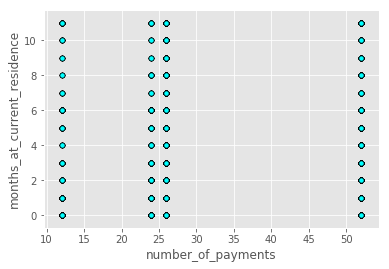

('Variables:', 'years_at_current_residence', 'number_of_payments')


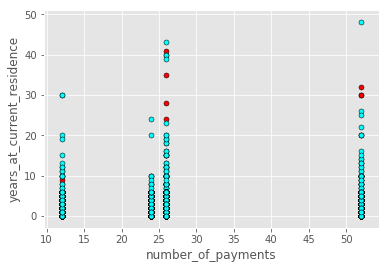

('Variables:', 'direct_deposit', 'number_of_payments')


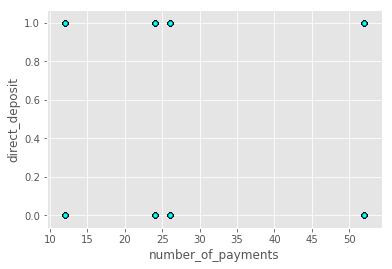

('Variables:', 'black_listed', 'number_of_payments')


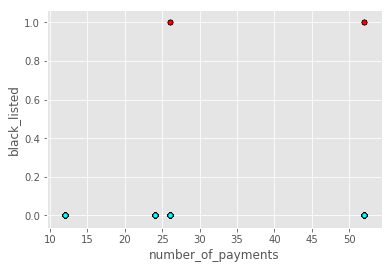

('Variables:', 'language_preference', 'number_of_payments')


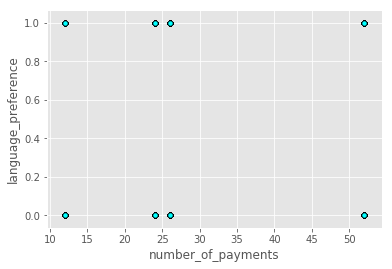

('Variables:', 'military_applicant', 'number_of_payments')


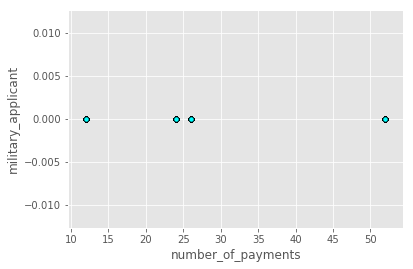

('Variables:', 'scheduled_payment_amt', 'number_of_payments')


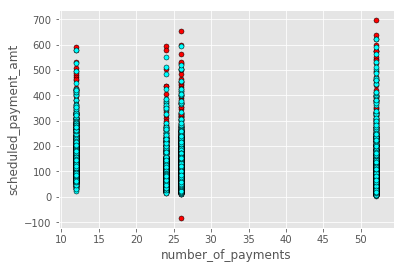

('Variables:', 'age', 'number_of_payments')


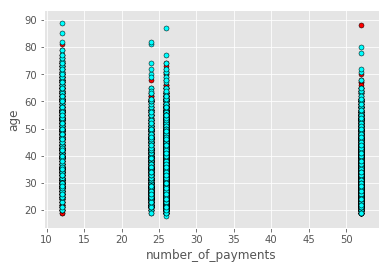

('Variables:', 'ini_decision_apv', 'number_of_payments')


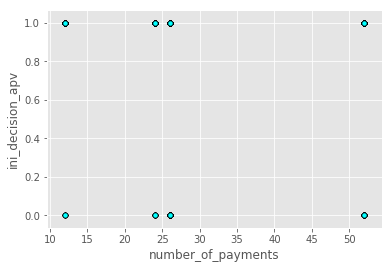

('Variables:', 'ini_decision_apv_wc', 'number_of_payments')


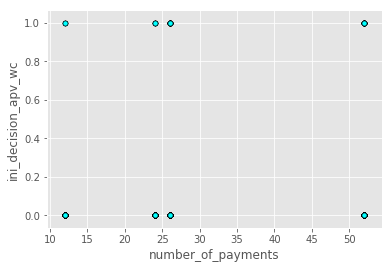

('Variables:', 'ini_decision_dnd', 'number_of_payments')


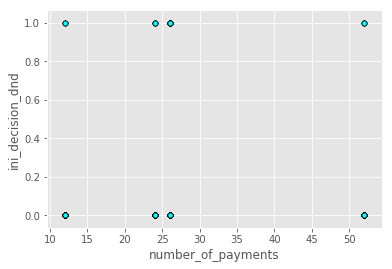

('Variables:', 'approval_amount', 'age')


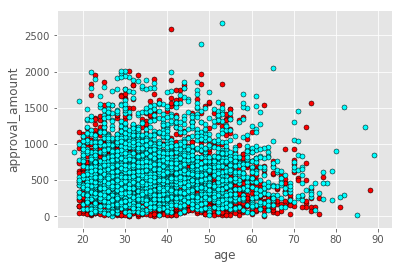

('Variables:', 'contacted', 'age')


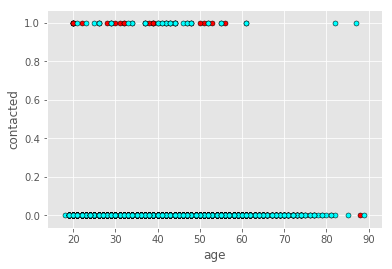

('Variables:', 'email_contacted_ts', 'age')


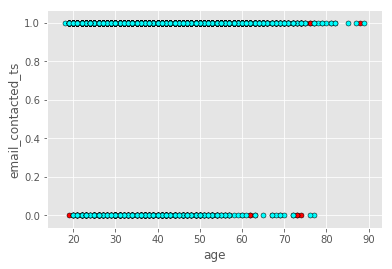

('Variables:', 'sms_contacted_ts', 'age')


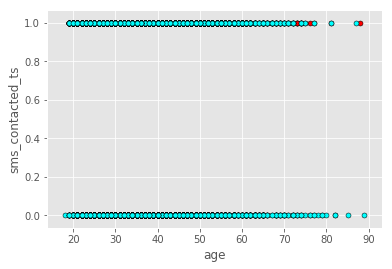

('Variables:', 'rent_or_own', 'age')


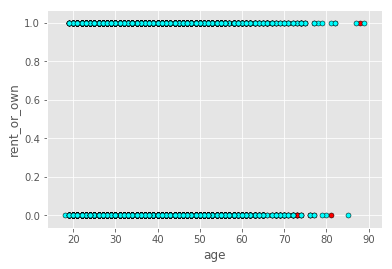

('Variables:', 'months_at_current_residence', 'age')


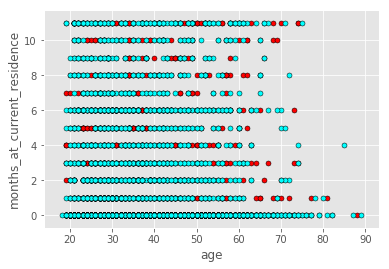

('Variables:', 'years_at_current_residence', 'age')


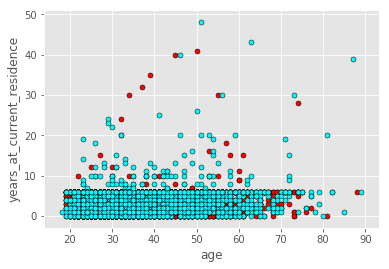

('Variables:', 'direct_deposit', 'age')


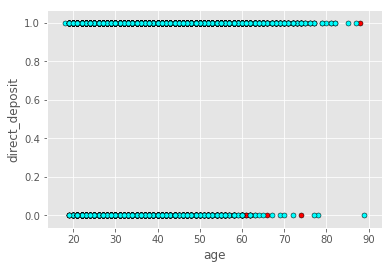

('Variables:', 'black_listed', 'age')


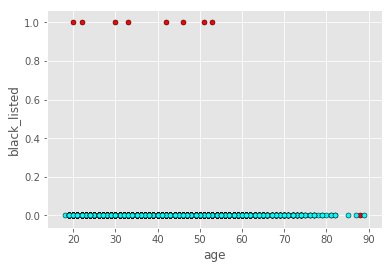

('Variables:', 'language_preference', 'age')


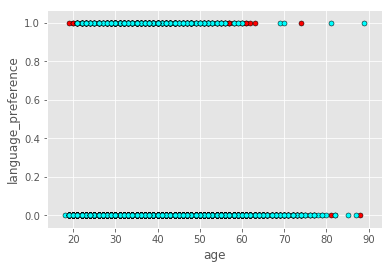

('Variables:', 'military_applicant', 'age')


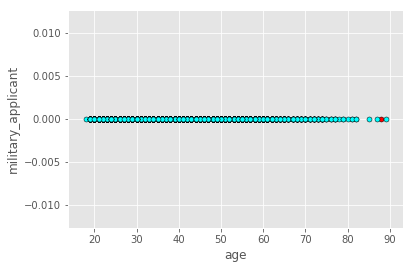

('Variables:', 'scheduled_payment_amt', 'age')


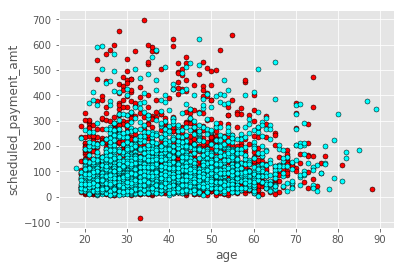

('Variables:', 'number_of_payments', 'age')


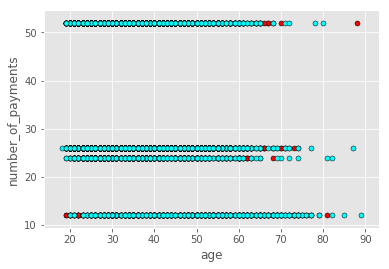

('Variables:', 'ini_decision_apv', 'age')


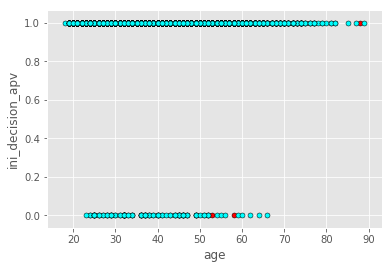

('Variables:', 'ini_decision_apv_wc', 'age')


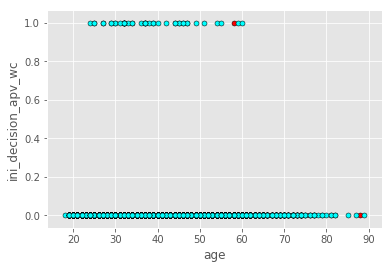

('Variables:', 'ini_decision_dnd', 'age')


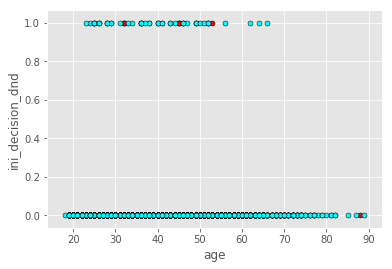

('Variables:', 'approval_amount', 'ini_decision_apv')


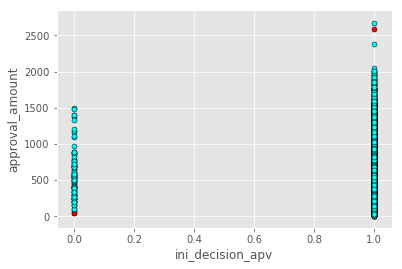

('Variables:', 'contacted', 'ini_decision_apv')


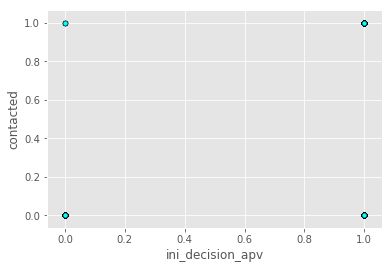

('Variables:', 'email_contacted_ts', 'ini_decision_apv')


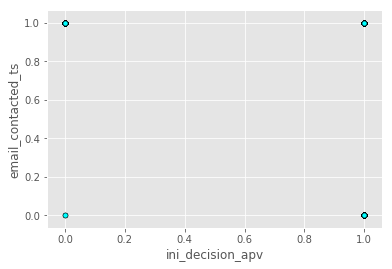

('Variables:', 'sms_contacted_ts', 'ini_decision_apv')


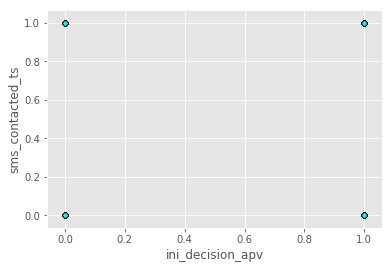

('Variables:', 'rent_or_own', 'ini_decision_apv')


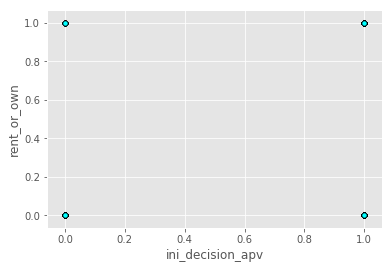

('Variables:', 'months_at_current_residence', 'ini_decision_apv')


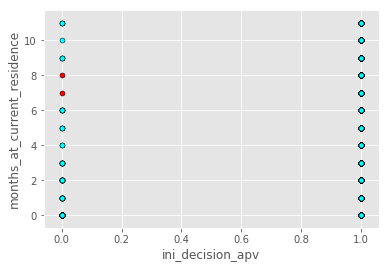

('Variables:', 'years_at_current_residence', 'ini_decision_apv')


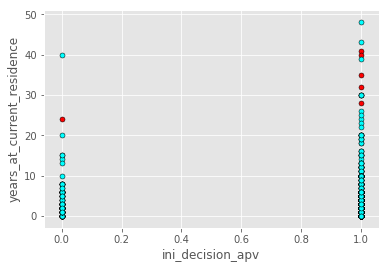

('Variables:', 'direct_deposit', 'ini_decision_apv')


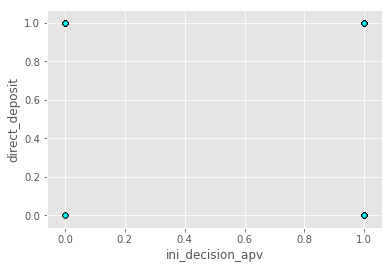

('Variables:', 'black_listed', 'ini_decision_apv')


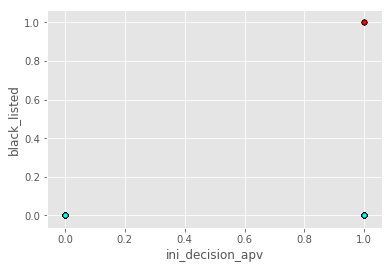

('Variables:', 'language_preference', 'ini_decision_apv')


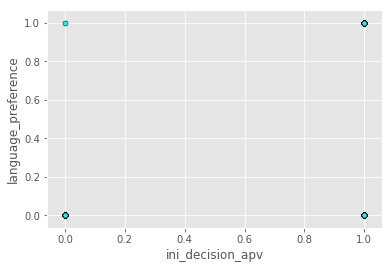

('Variables:', 'military_applicant', 'ini_decision_apv')


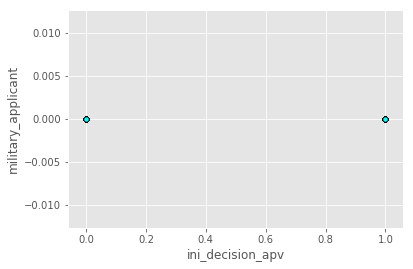

('Variables:', 'scheduled_payment_amt', 'ini_decision_apv')


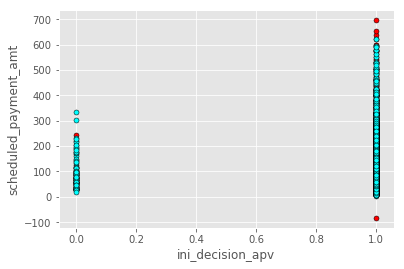

('Variables:', 'number_of_payments', 'ini_decision_apv')


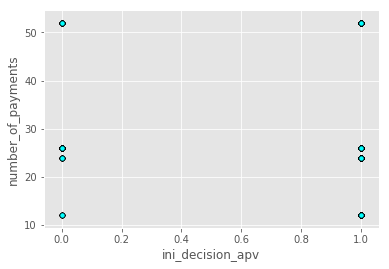

('Variables:', 'age', 'ini_decision_apv')


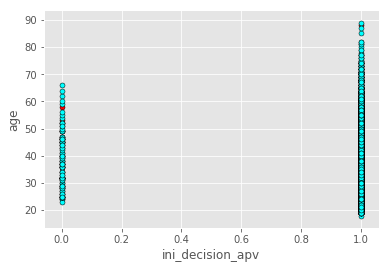

('Variables:', 'ini_decision_apv_wc', 'ini_decision_apv')


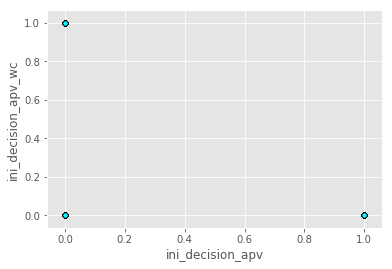

('Variables:', 'ini_decision_dnd', 'ini_decision_apv')


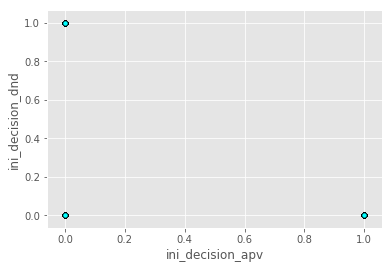

('Variables:', 'approval_amount', 'ini_decision_apv_wc')


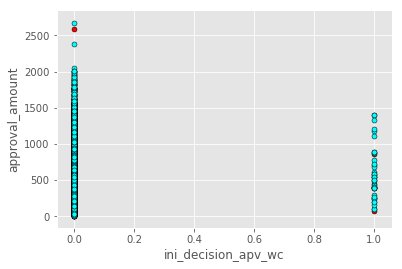

('Variables:', 'contacted', 'ini_decision_apv_wc')


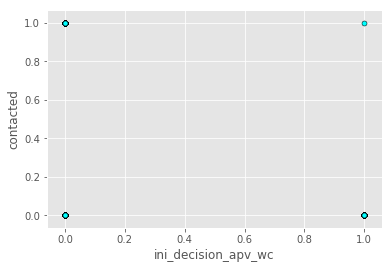

('Variables:', 'email_contacted_ts', 'ini_decision_apv_wc')


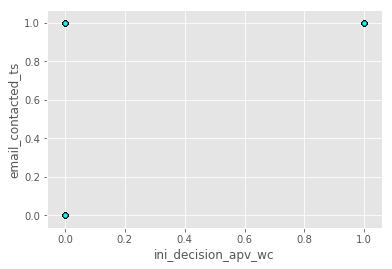

('Variables:', 'sms_contacted_ts', 'ini_decision_apv_wc')


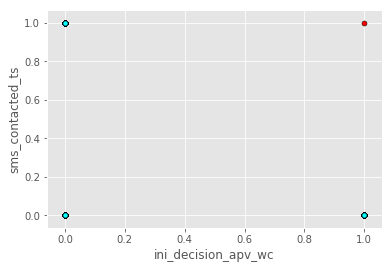

('Variables:', 'rent_or_own', 'ini_decision_apv_wc')


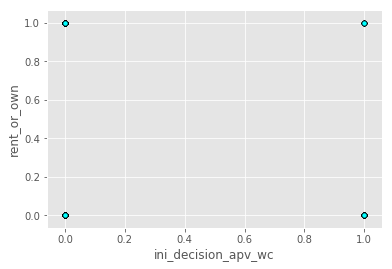

('Variables:', 'months_at_current_residence', 'ini_decision_apv_wc')


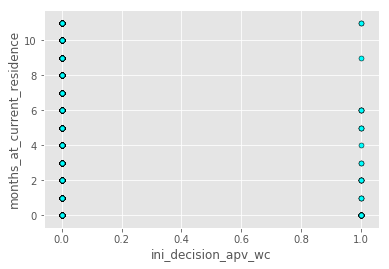

('Variables:', 'years_at_current_residence', 'ini_decision_apv_wc')


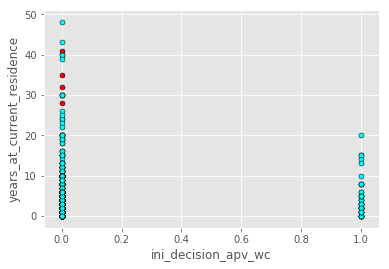

('Variables:', 'direct_deposit', 'ini_decision_apv_wc')


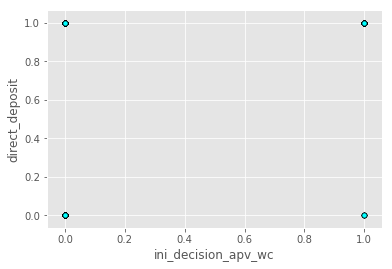

('Variables:', 'black_listed', 'ini_decision_apv_wc')


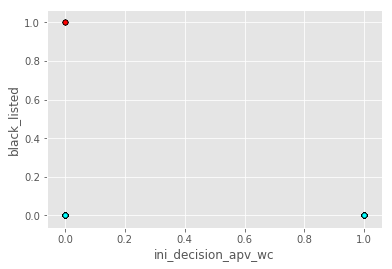

('Variables:', 'language_preference', 'ini_decision_apv_wc')


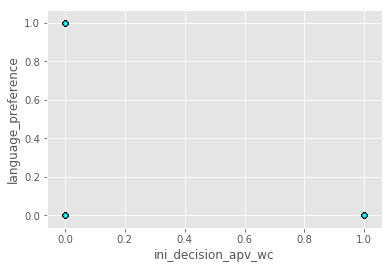

('Variables:', 'military_applicant', 'ini_decision_apv_wc')


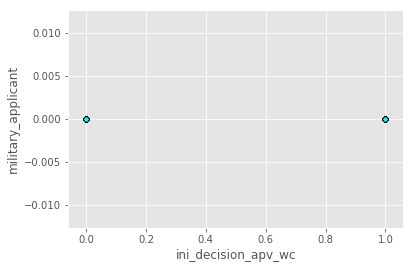

('Variables:', 'scheduled_payment_amt', 'ini_decision_apv_wc')


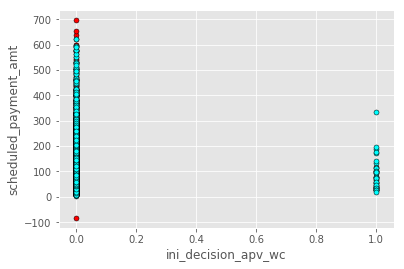

('Variables:', 'number_of_payments', 'ini_decision_apv_wc')


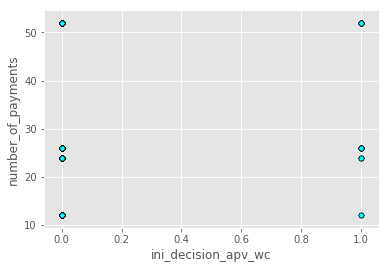

('Variables:', 'age', 'ini_decision_apv_wc')


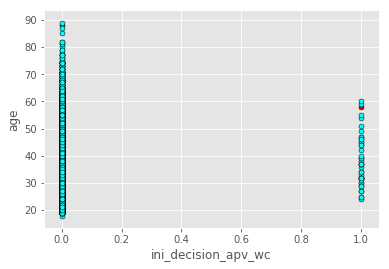

('Variables:', 'ini_decision_apv', 'ini_decision_apv_wc')


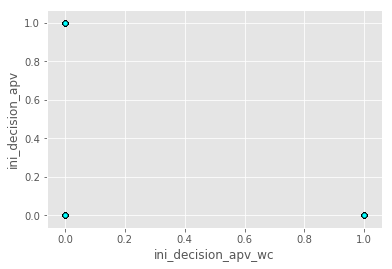

('Variables:', 'ini_decision_dnd', 'ini_decision_apv_wc')


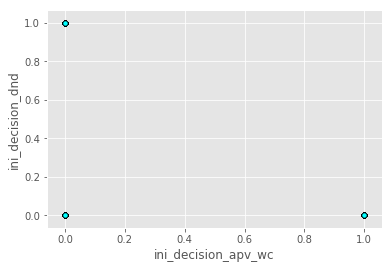

('Variables:', 'approval_amount', 'ini_decision_dnd')


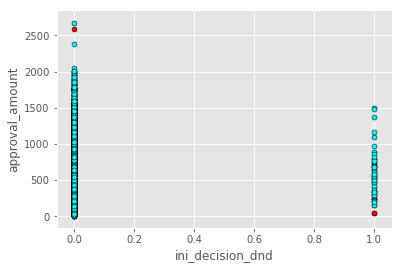

('Variables:', 'contacted', 'ini_decision_dnd')


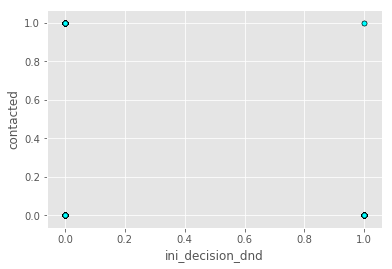

('Variables:', 'email_contacted_ts', 'ini_decision_dnd')


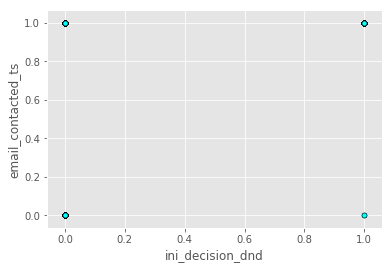

('Variables:', 'sms_contacted_ts', 'ini_decision_dnd')


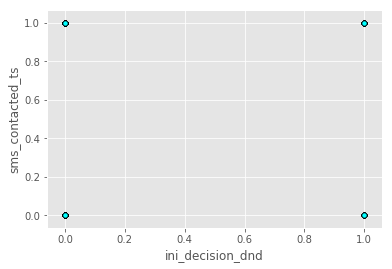

('Variables:', 'rent_or_own', 'ini_decision_dnd')


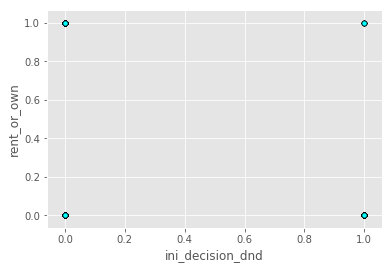

('Variables:', 'months_at_current_residence', 'ini_decision_dnd')


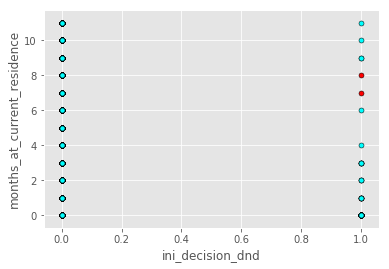

('Variables:', 'years_at_current_residence', 'ini_decision_dnd')


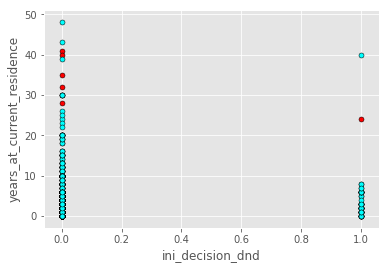

('Variables:', 'direct_deposit', 'ini_decision_dnd')


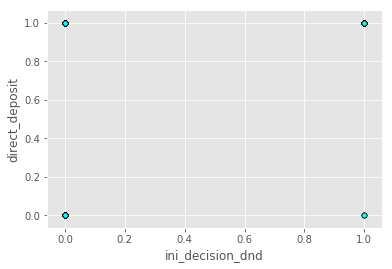

('Variables:', 'black_listed', 'ini_decision_dnd')


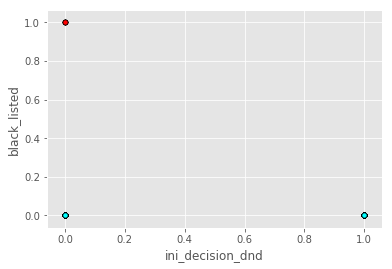

('Variables:', 'language_preference', 'ini_decision_dnd')


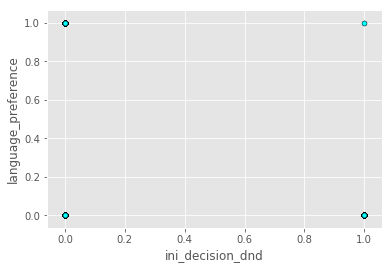

('Variables:', 'military_applicant', 'ini_decision_dnd')


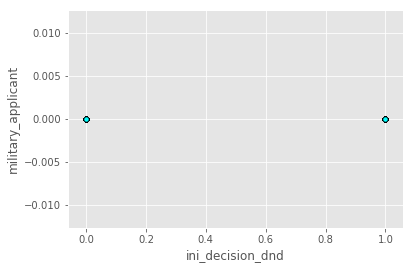

('Variables:', 'scheduled_payment_amt', 'ini_decision_dnd')


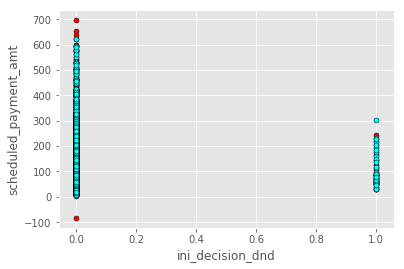

('Variables:', 'number_of_payments', 'ini_decision_dnd')


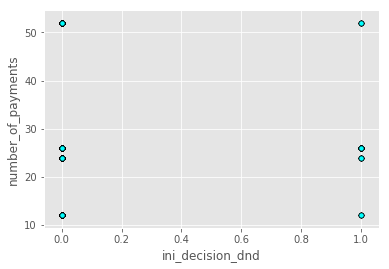

('Variables:', 'age', 'ini_decision_dnd')


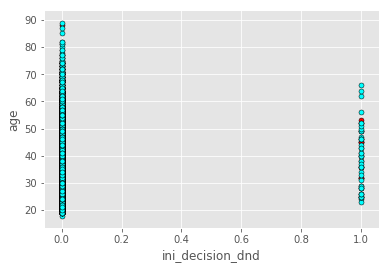

('Variables:', 'ini_decision_apv', 'ini_decision_dnd')


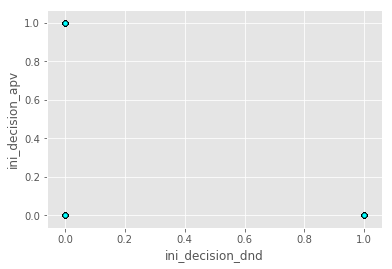

('Variables:', 'ini_decision_apv_wc', 'ini_decision_dnd')


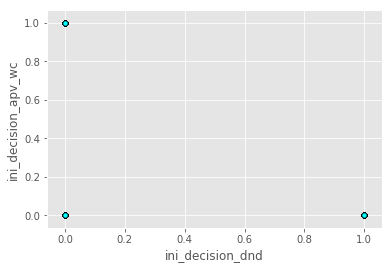

In [43]:
plotRelationsWithColumns(balance_data_no_norm,redeem_true_index,redeem_false_index)

# Conclusión de las graficas

Realizando un analisis por medio de los graficos se puede concluir que la siguientes variables son las que presentan mayor dispersion comparandolas con las otras variables en el dataset, en total serian 6 variables 

Variables

black_listed

years_at_current_residence

last_payment_amount

approval_amount

age

months_at_current_residence


















# Forma individual de graficar dos variables en el dataset

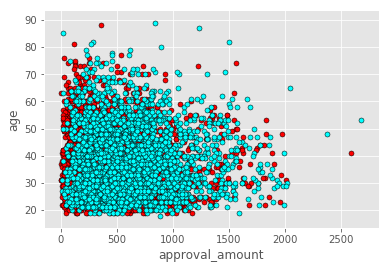

In [44]:

x = 'approval_amount'
y = 'age'
plotPoints(balance_data_no_norm,redeem_true_index,redeem_false_index[:len(redeem_true_index)],x,y)


In [45]:
balance_data.isna().mean().round(4) * 100

approval_amount                0.0
contacted                      0.0
email_contacted_ts             0.0
sms_contacted_ts               0.0
rent_or_own                    0.0
months_at_current_residence    0.0
years_at_current_residence     0.0
direct_deposit                 0.0
black_listed                   0.0
language_preference            0.0
military_applicant             0.0
scheduled_payment_amt          0.0
number_of_payments             0.0
age                            0.0
ini_decision_apv               0.0
ini_decision_apv_wc            0.0
ini_decision_dnd               0.0
dtype: float64

# Obteniendo variables relevantes con RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [48]:
X_train, X_test, y_train, y_test = train_test_split(balance_data,labels.redeem_ts,test_size=0.15,random_state=13)

In [49]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)